# Yapay Zeka Temelli Öneri Sistemleri Algoritmalarının Bitkisel Üretim Alanında Kullanılması

In [9]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

## Kaynak Verilerin Belirlenmesi

### Türkiye Organik Karbon Projesi

- Türkiye Organik Karbon Projesi
    * proje dokümanları incelendi [link](https://www.tarimorman.gov.tr/CEM/Belgeler/yay%C4%B1nlar/yay%C4%B1nlar%202018/Karbon%20Proje%2027Eyl%C3%BCl2018.pdf)
    * Projede kullanılan veri tipleri incelendi

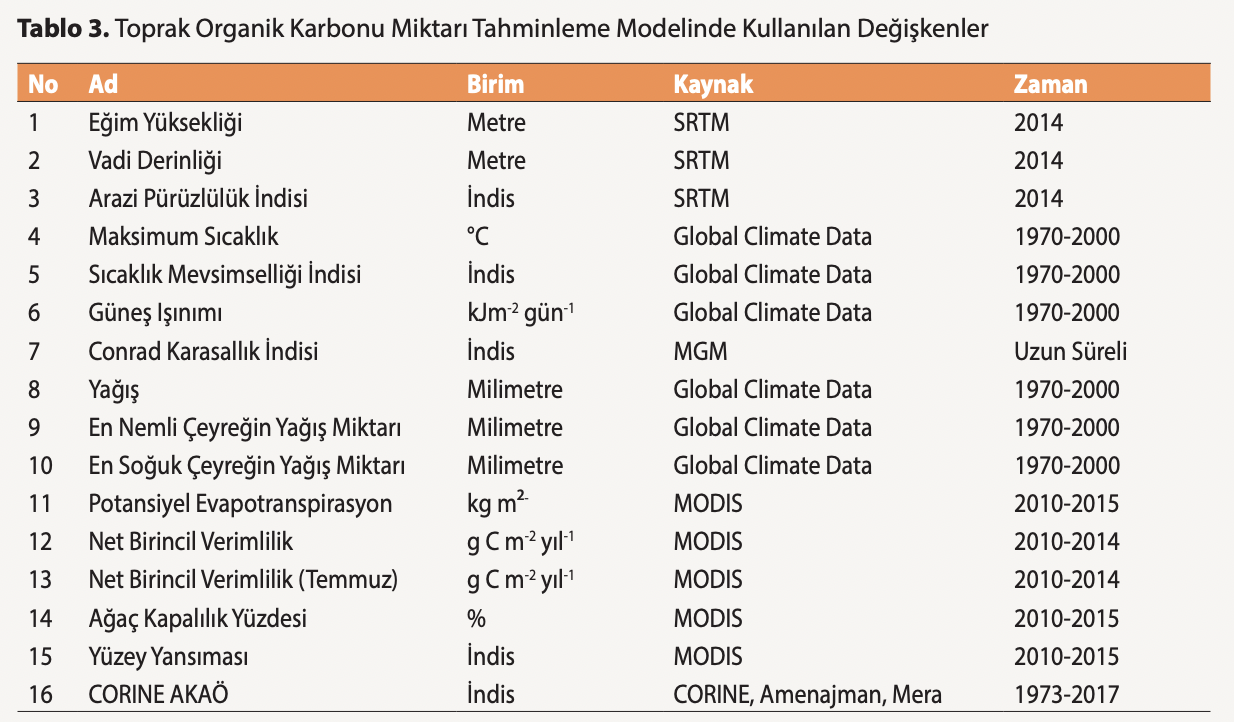

### TUİK Verileri

* TUİK Veri Portalı'nda yer alan Bitkisel Üretim İstatistikleri kullanılmıştır
    * Tahıl ve Diğer Bitkisel ürünler
    * Sebzeler
    * Meyveler içecek ve baharat bilgileri
    * Süs Bitkileri
* Örtü altı üretim bitkileri hariç tutulmuştur
    * Yatırım maliyeti
    * Bakım maliyeti 
    
    gibi çalışma kapsamında elde olmayan verilerin hatalı öneri üretmemesi amacıyla kapsam dışı bırakılmıştır.
* Veri kırılımı
    - Ürün Niteliği: 
        * Ekilen alan, 
        * hasat edilen alan,
        * Verim
        * Üretim Miktarı
    - Ürünler:
        * 219 farklı ürün tipinde veri mevcuttur
    - Ölçüm Birimi:
        * Dekar
        * Kg-Ton
        * Kg-Ton / Dekar
    - Zaman Aralığı
        * 2004-2020 yıllarına ait veriler bulunmaktadır
        * Çalışmada 2020 yılı içerisindeki üretim miktarları baz alınmıştır
    - Veri Düzeyi
        * Veritabanında Türkiye, İBBS1, İBBS2, İl ve İlçe düzeyi mevcut
        * Çalışmada İlçe düzeyi baz alınmıştır, 877 adet ilçe'ye ait veri mevcuttur

### Veri kaynağına karar verilmesi
- TOK projesindeki verilerin güncel olmaması
- Proje verilerinin yenilenmesinin maliyetinin yüksek oluşu
- Mevcutta üretim kararlarının konvansiyonel toprak analiz yöntemleri ile yapılıyor oluşu, yenilikçi bir yaklaşım getirilememesi
- Yapay Zeka destekli Öneri Sistemleri yönteminin bitkisel üretim konusunda literatürde çok rastlanmayan bir yöntem olması 

sebeblerinden ötürü TUİK verilerinin kullanılmasına karar verilmiştir. 

### Veri Hazırlığı

- Veri Kaynağı
    * https://biruni.tuik.gov.tr/medas/?kn=92&locale=tr
- Verilerin düzenlenmesi
    * Her ürün tipi için ilçeler bazında ilçe verileri excel formatında indirildi
        - 4 ürün tipinde, 81 ile ait tüm ilçe verileri
    * İlgili alanlar tuik formatından tablo formatına getirildi
    * Verim bilgisi bulunmayan bitki türleri için verim değerleri hesaplandı
        - üretim miktarı / yetiştirme alanı
    * Toplam 611 bin adet gözlem verisi temin edilmiştir.

### Veri İstatistikleri

#### İl, İlçe, Ürün Adetleri

- İl Adet: 81
- İlçe Adet 877
- Ürün Adet 219

#### Ürün Gözlem Adetleri

|ürün|il|ilçe|ürün|gözlem|
|----|--|----|----|------|
|Meyveler|81|856|63|267460|
|Sebzeler|80|847|55|100164|
|Süs Bitkileri|39|146|22|6864|
|Tahıllar|81|864|79|236576|

#### Ölçüm Birimleri

|ürün tipi|ölçüm|birim|
|--|--|--|
|Meyveler Içecek Ve Baharat Bitkileri|Meyve Veren Yaşta Ağaç Sayısı|Adet Sayısı
|Meyveler Içecek Ve Baharat Bitkileri|Meyve Vermeyen Yaşta Ağaç Sayısı|Adet Sayısı
|Meyveler Içecek Ve Baharat Bitkileri|Toplu Meyveliklerin Alanı|Dekar
|Meyveler Içecek Ve Baharat Bitkileri|Verim|Kg/Dekar
|Meyveler Içecek Ve Baharat Bitkileri|Verim|Kg/Meyve Veren Ağaç
|Meyveler Içecek Ve Baharat Bitkileri|Üretim Miktarı|Ton
|Sebzeler|Ekilen Alan|Dekar
|Sebzeler|Üretim Miktarı|Ton
|Süs Bitkileri|Ekilen Alan|Metrekare
|Süs Bitkileri|Üretim Miktarı|Adet Sayısı
|Tahıllar Ve Diğer Bitkisel Ürünler|Ekilen Alan|Dekar
|Tahıllar Ve Diğer Bitkisel Ürünler|Hasat Edilen Alan|Dekar
|Tahıllar Ve Diğer Bitkisel Ürünler|Verim|Kg/Dekar
|Tahıllar Ve Diğer Bitkisel Ürünler|Üretim Miktarı|Ton

## Veri Önişleme

### Çoklayan kayıtların tekilleştirilmesi:
    - 1675 adet çoklayan kayıt tespit edilmiş olup doğru ölçüm yapılabilmesi için veritabanından çıkartılmıştır.

### Eksik Verilerin tamamlanması
    - TUİK datasında Süs Bitkileri ve Sebze kategorisindeki verilerde "Verim" bilgisi bulunmadığı için üretim miktarı ve üretim alanları kullanılarak hesaplanıp veri setine eklenmiştir.
    
### Sıfır olan kayıtların düzeltilmesi
    - Üretim Miktarı 0 olan kayıtların silinmesi. Örnek: Fındık ürününde 23 veride üretim miktarı ve verim oranı 0 olarak ölçülmüştür.
    - Üretim Miktarı 0'dan büyük olup verim oranı 0 olan kayıtlar ilgili üründeki hatalı bildirimlerin datayı etkilememesi için silinmiştir. Örnek: Gümüşhane Torul ilçesinde 3800 adet meyve veren ağaç adeti ve 1 ton üretim miktarı bildirilmesine rağmen verim oranı son üç senedir 0 olarak bildirilmektedir.

|Ilce_Adi|Urun_Adi|Uretim_Miktar|Uretim_Olcu|Meyvelik_Alan|Meyvelik_Alan_Olcu|Verim|
|-|-|-|-|-|-|-|
|Feke|Sofralık Zeytinler|2.0|Ton|120.0|Dekar|0.0|
|Feke|Yağlık Zeytinler (Zeytinyağı Üretimi İçin)|2.0|Ton|190.0|Dekar|0.0|
|Kemalpaşa|Fındık|1.0|Ton|40.0|Dekar|0.0|
|Torul|Fındık|1.0|Ton|100.0|Dekar|0.0|
|Pazarcık|Kayısı|3.0|Ton|50.0|Dekar|0.0|
|Polateli|Şam Fıstığı (Antep Fıstığı)|10.0|Ton|3002.0|Dekar|0.0|
|Darende|Şam Fıstığı (Antep Fıstığı)|2.0|Ton|200.0|Dekar|0.0|
|Çamlıyayla|Sofralık Zeytinler|2.0|Ton|700.0|Dekar|0.0|
|Çamlıyayla|Yağlık Zeytinler (Zeytinyağı Üretimi İçin)|2.0|Ton|800.0|Dekar|0.0|
|Ladik|Fındık|7.0|Ton|300.0|Dekar|0.0|
|Of|Fındık|232.0|Ton|7608.0|Dekar|0.0|
|Kozlu|Fındık|483.0|Ton|5157.0|Dekar|0.0|

    - Ekilen Alan bilgisi 0 olan 8 adet gözlem veritabanından silinmiştir. Örnek: Kültür Mantarı üretim miktarı mevcut olmasına rağmen üretim alanı bilgisi bulunmadığı için verim oranı hesaplanamamıştır.


### Yeterli Gözlem sayısına ulaşamayan Nadir Ürünler

|Urun_Adi|lokasyon adet|
|-|-|
|İris, Kesme|1|
|Üçgül (Yeşilot)|1|
|Sorgum|1|
|Şerbetçiotu Kozalağı|2|
|Kapari, İşlenmemiş|2|
|Keten, Lif|2|
|Statice, Kesme|2|
|Korunga Tohumu|2|
|Şeker Kamışı|3|
|Anemon (Manisa Lalesi), Kesme|3|
|Nergis, Kesme|4|
|Solidago (Altınbaşak), Kesme|4|
|Orkide, Kesme|4|
|Tatlı Patates|4|
|Acı Bakla (İnsan Tüketimi İçin)|4|

### Veri Doğrulaması
* Olası veri kalitesi sorunlarına karşı aykırı değer analizleri yapıldı
    - Aynı bitki türleri içerisinde verim değeri ortalama değerin 3 standart sapma altı ve üstü olan gözlemler bu aralıklara çekildi 
    - Çok yüksek ve çok düşük üretim alanları gözle kontrol edildi
    - Aykırı olabileceği tespit edilen verilerin önceki yıl üretim miktarları TUİK üzerinden kontrol edildi
   
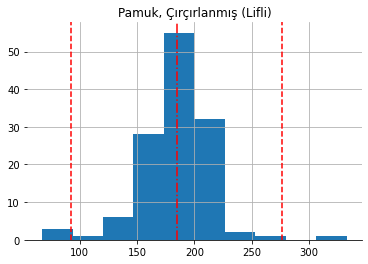

## İlçeler Arası Benzerlik

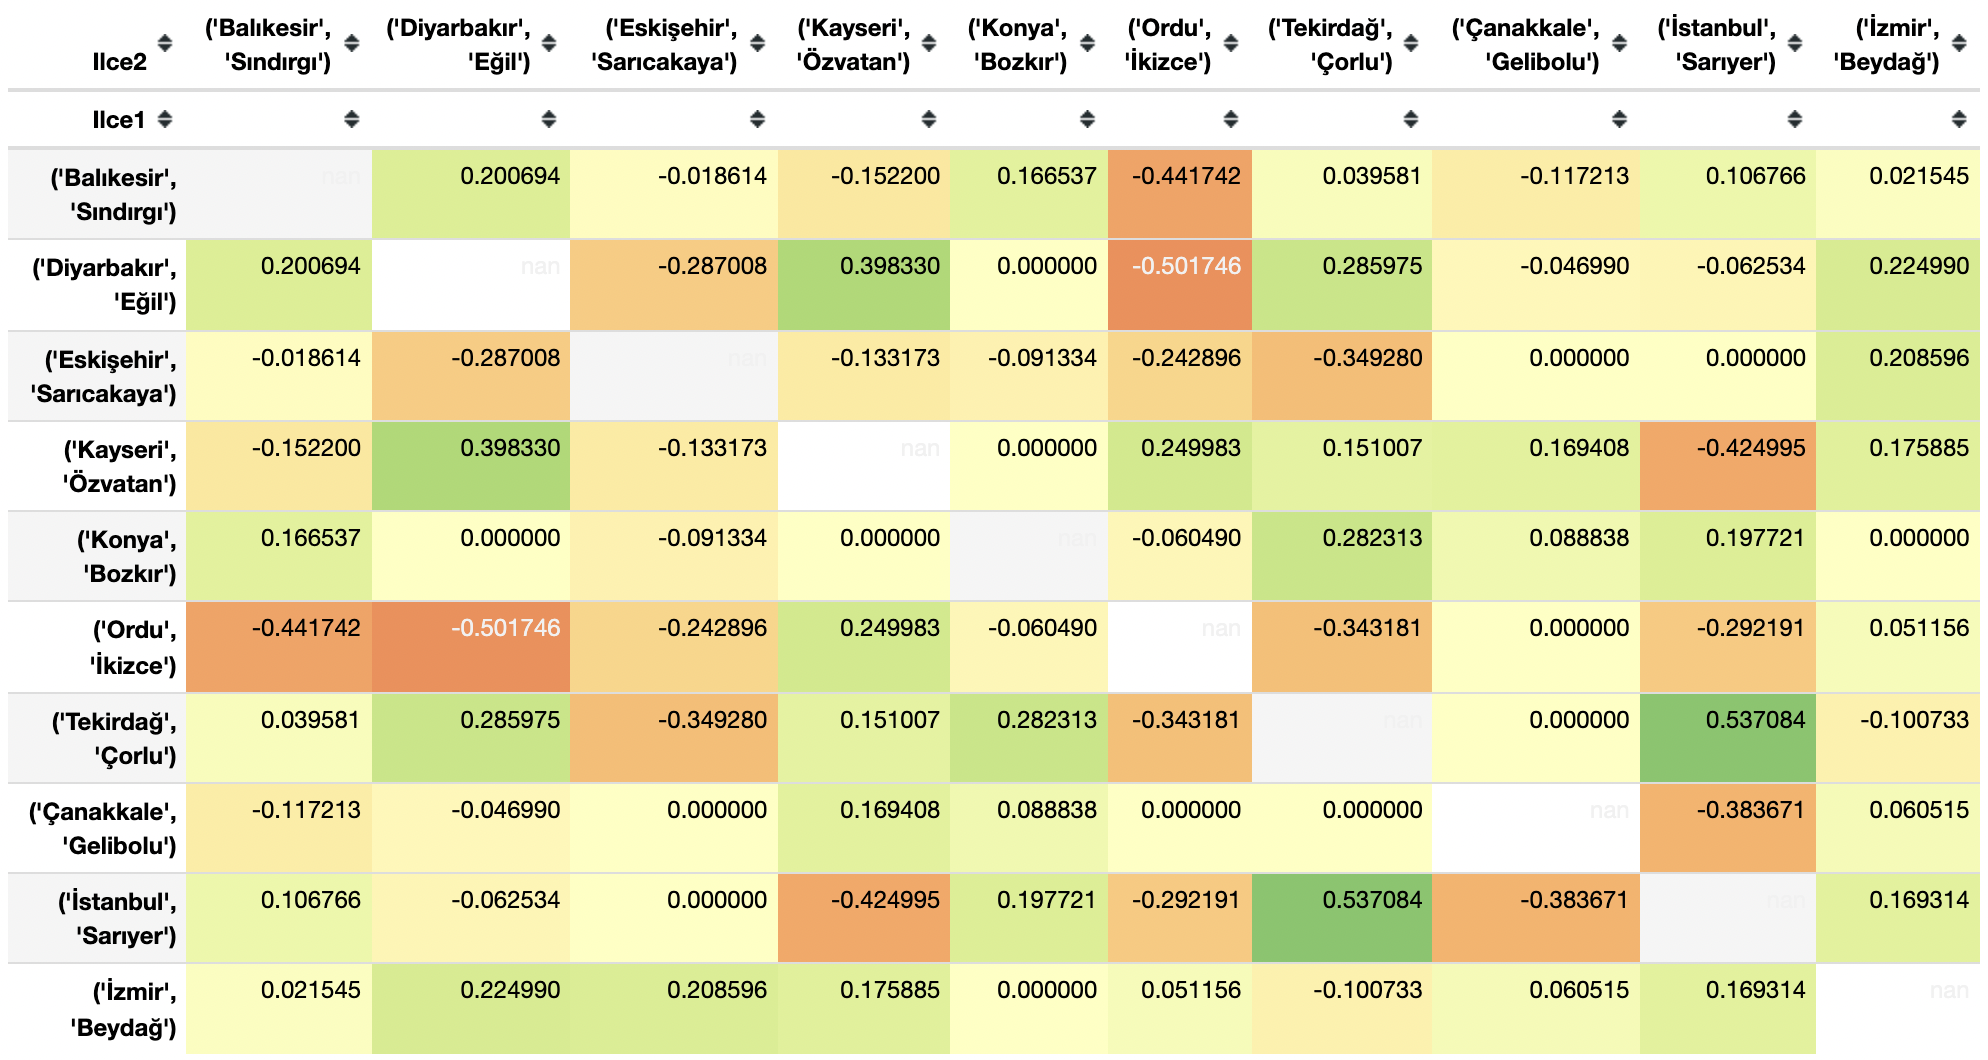

A:-0.50|B:+0.53|C:0 (yeterli güven aralığı yok)
-|-|-
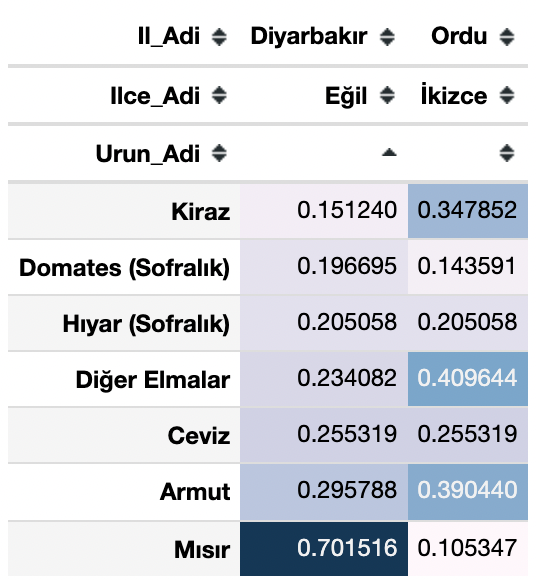|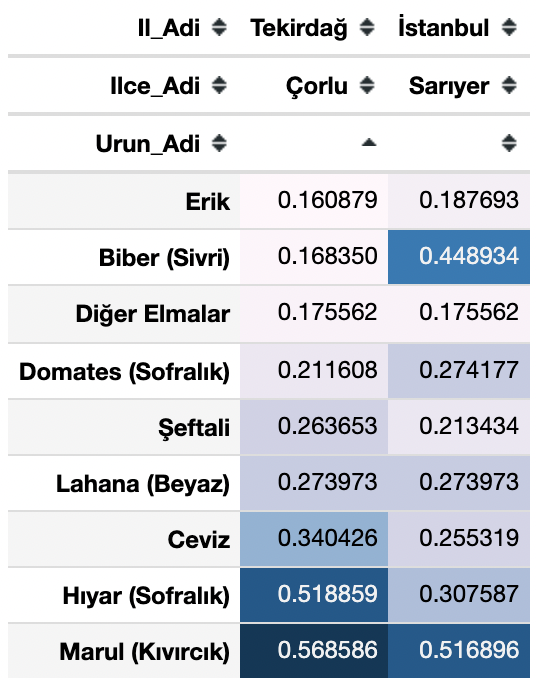|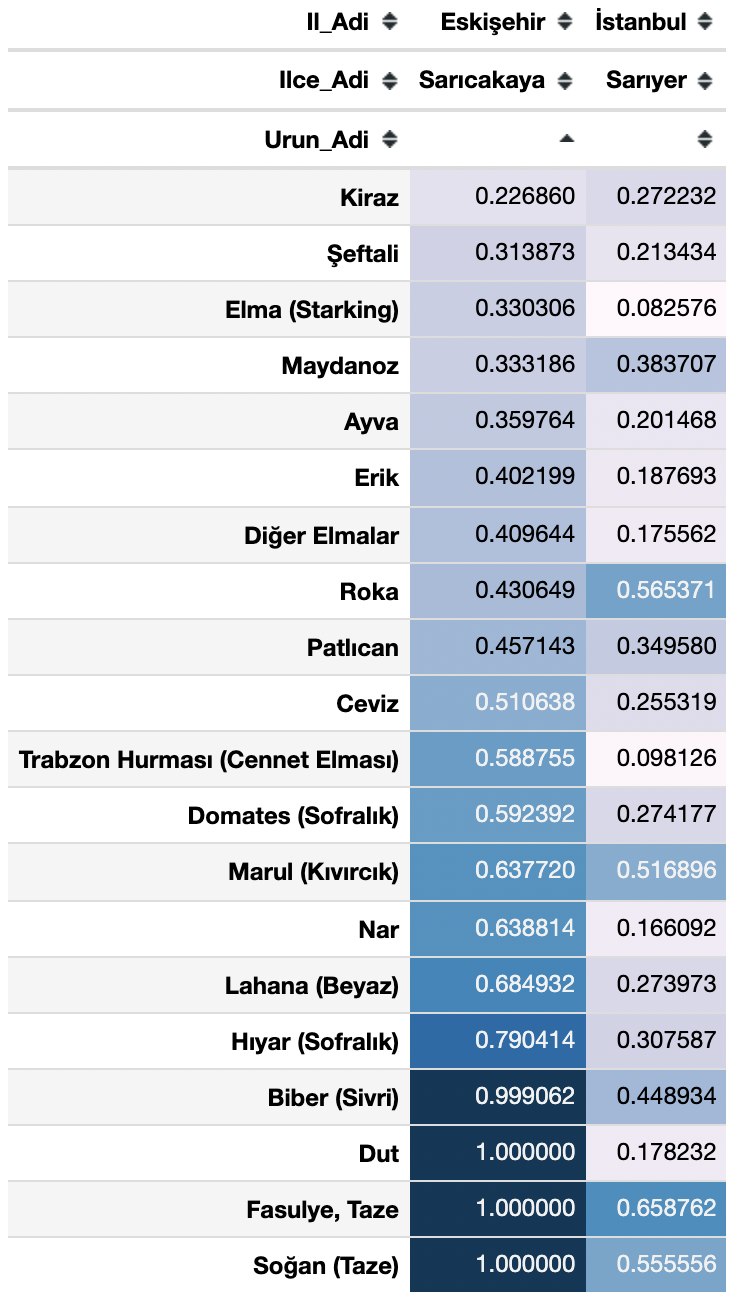

<hr/>
<center><strong class='h1' style='color:red'>TEKNİK KISIM</strong></center>
<hr />

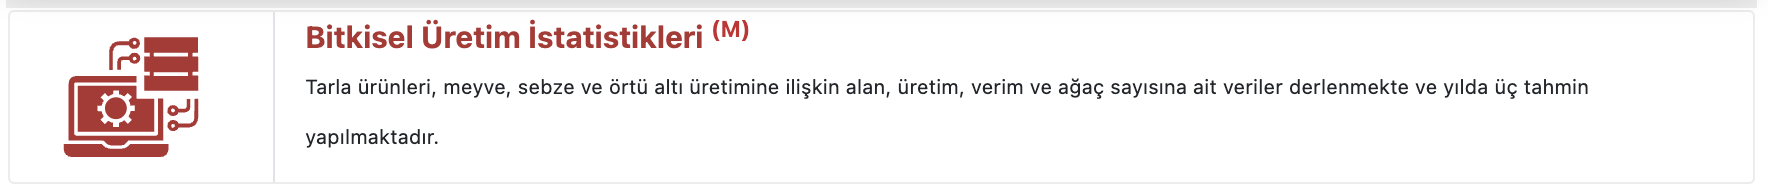

# Veri Hazırlığı

## Veri Yapısının Hazırlanması

In [1]:
import imp
import pandas as pd
import bitki_oner_v1 as bon
imp.reload(bon)
dfs = bon.create_dataset(path='../data', reload=False)

In [2]:
display(dfs.head())
print(dfs.shape)

,Urun_Tipi,Yil,Il_Adi,Ilce_Adi,Ilce_Id,Urun_Id,Urun_Adi,Urun_Olcum,Olcum_Birim,Miktar
0,Tahıllar Ve Diğer Bitkisel Ürünler,2020,Afyonkarahisar,Bayat,1773,01.11.11.00.00.,Durum Buğdayı,Ekilen Alan,Dekar,8454.0
1,Tahıllar Ve Diğer Bitkisel Ürünler,2020,Afyonkarahisar,Başmakçı,1771,01.11.11.00.00.,Durum Buğdayı,Ekilen Alan,Dekar,9867.0
2,Tahıllar Ve Diğer Bitkisel Ürünler,2020,Afyonkarahisar,Bolvadin,1200,01.11.11.00.00.,Durum Buğdayı,Ekilen Alan,Dekar,19668.0
3,Tahıllar Ve Diğer Bitkisel Ürünler,2020,Afyonkarahisar,Dazkırı,1267,01.11.11.00.00.,Durum Buğdayı,Ekilen Alan,Dekar,12936.0
4,Tahıllar Ve Diğer Bitkisel Ürünler,2020,Afyonkarahisar,Dinar,1281,01.11.11.00.00.,Durum Buğdayı,Ekilen Alan,Dekar,98574.0


(611064, 10)


In [3]:
dfs[(dfs.Urun_Adi.str.contains('eten')) & (dfs.Ilce_Adi=='Bayat')]

,Urun_Tipi,Yil,Il_Adi,Ilce_Adi,Ilce_Id,Urun_Id,Urun_Adi,Urun_Olcum,Olcum_Birim,Miktar
414,Tahıllar Ve Diğer Bitkisel Ürünler,2020,Afyonkarahisar,Bayat,1773,01.16.19.00.01.,"Keten, Lif",Ekilen Alan,Dekar,NaN
1242,Tahıllar Ve Diğer Bitkisel Ürünler,2020,Afyonkarahisar,Bayat,1773,01.16.19.00.01.,"Keten, Lif",Hasat Edilen Alan,Dekar,NaN
2070,Tahıllar Ve Diğer Bitkisel Ürünler,2020,Afyonkarahisar,Bayat,1773,01.16.19.00.01.,"Keten, Lif",Verim,Kg/Dekar,NaN
2898,Tahıllar Ve Diğer Bitkisel Ürünler,2020,Afyonkarahisar,Bayat,1773,01.16.19.00.01.,"Keten, Lif",Üretim Miktarı,Ton,NaN


## Veri Ön İşleme

### Çoklamaların temizlenmesi

In [4]:
imp.reload(bon)
dfs = bon.coklama_temizle(dfs)

4819 adet çoklayan kayıt silindi


### Eksik Verilerin Tamamlanması

#### Süs Bitkileri - Verim

In [5]:
sus_verim = bon.eksiveri_sus_verim(dfs)
sus_verim

Olcum_Birim2,Urun_Tipi,Yil,Il_Adi,Ilce_Adi,Ilce_Id,Urun_Id,Urun_Adi,Urun_Olcum,Olcum_Birim,Miktar
0,Süs Bitkileri,2020,Adana,Sarıçam,2032,01.30.10.03.06.,Dış Mekan Süs Bitkileri,Verim,Adet/Metrekare,75.000000
1,Süs Bitkileri,2020,Adana,Seyhan,1104,01.19.21.00.10.,"Gül, Kesme",Verim,Adet/Metrekare,60.000000
2,Süs Bitkileri,2020,Adana,Seyhan,1104,01.30.10.03.05.,İç Mekan Süs Bitkileri (Oda Bitkileri),Verim,Adet/Metrekare,48.674699
3,Süs Bitkileri,2020,Adana,Seyhan,1104,01.30.10.03.06.,Dış Mekan Süs Bitkileri,Verim,Adet/Metrekare,49.628713
4,Süs Bitkileri,2020,Adana,Yumurtalık,1734,01.30.10.03.06.,Dış Mekan Süs Bitkileri,Verim,Adet/Metrekare,0.250000
...,...,...,...,...,...,...,...,...,...,...
364,Süs Bitkileri,2020,İzmir,Urla,1703,01.19.21.00.19.,"Nergis, Kesme",Verim,Adet/Metrekare,17.000000
365,Süs Bitkileri,2020,İzmir,Urla,1703,01.30.10.03.05.,İç Mekan Süs Bitkileri (Oda Bitkileri),Verim,Adet/Metrekare,2.222222
366,Süs Bitkileri,2020,İzmir,Urla,1703,01.30.10.03.06.,Dış Mekan Süs Bitkileri,Verim,Adet/Metrekare,4.000000
367,Süs Bitkileri,2020,İzmir,Ödemiş,1563,01.30.10.03.06.,Dış Mekan Süs Bitkileri,Verim,Adet/Metrekare,15.054465


#### Sebzeler - Verim

In [6]:
sebze_verim = bon.eksikveri_sebze_verim(dfs)
sebze_verim

Olcum_Birim2,Urun_Tipi,Yil,Il_Adi,Ilce_Adi,Ilce_Id,Urun_Id,Urun_Adi,Urun_Olcum,Olcum_Birim,Miktar
0,Sebzeler,2020,Adana,Aladağ,1757,01.11.61.00.01.,"Fasulye, Taze",Verim,Ton/Dekar,0.600000
1,Sebzeler,2020,Adana,Aladağ,1757,01.13.21.00.00.,Karpuz,Verim,Ton/Dekar,3.500000
2,Sebzeler,2020,Adana,Aladağ,1757,01.13.31.00.03.,Biber (Sivri),Verim,Ton/Dekar,1.500000
3,Sebzeler,2020,Adana,Aladağ,1757,01.13.32.00.01.,Hıyar (Sofralık),Verim,Ton/Dekar,2.000000
4,Sebzeler,2020,Adana,Aladağ,1757,01.13.34.00.01.,Domates (Sofralık),Verim,Ton/Dekar,4.500000
...,...,...,...,...,...,...,...,...,...,...
14498,Sebzeler,2020,Şırnak,İdil,1403,01.13.31.00.03.,Biber (Sivri),Verim,Ton/Dekar,0.142857
14499,Sebzeler,2020,Şırnak,İdil,1403,01.13.32.00.01.,Hıyar (Sofralık),Verim,Ton/Dekar,0.307692
14500,Sebzeler,2020,Şırnak,İdil,1403,01.13.33.00.00.,Patlıcan,Verim,Ton/Dekar,0.500000
14501,Sebzeler,2020,Şırnak,İdil,1403,01.13.34.00.01.,Domates (Sofralık),Verim,Ton/Dekar,0.407407


### Eksikleri Birleştir

In [7]:
imp.reload(bon)
dfe = bon.eksikleri_birlestir([dfs, sus_verim, sebze_verim])
display(dfe.head())

Birleştirilen veri seti adeti: 3
Kayıt adetleri: 606245,369,14503
Eksik değere sahip gözlem adeti 441348
Sonuç veri seti gözlem adeti (179769, 10)


,Urun_Tipi,Yil,Il_Adi,Ilce_Adi,Ilce_Id,Urun_Id,Urun_Adi,Urun_Olcum,Olcum_Birim,Miktar
0,Tahıllar Ve Diğer Bitkisel Ürünler,2020,Afyonkarahisar,Bayat,1773,01.11.11.00.00.,Durum Buğdayı,Ekilen Alan,Dekar,8454.0
1,Tahıllar Ve Diğer Bitkisel Ürünler,2020,Afyonkarahisar,Başmakçı,1771,01.11.11.00.00.,Durum Buğdayı,Ekilen Alan,Dekar,9867.0
2,Tahıllar Ve Diğer Bitkisel Ürünler,2020,Afyonkarahisar,Bolvadin,1200,01.11.11.00.00.,Durum Buğdayı,Ekilen Alan,Dekar,19668.0
3,Tahıllar Ve Diğer Bitkisel Ürünler,2020,Afyonkarahisar,Dazkırı,1267,01.11.11.00.00.,Durum Buğdayı,Ekilen Alan,Dekar,12936.0
4,Tahıllar Ve Diğer Bitkisel Ürünler,2020,Afyonkarahisar,Dinar,1281,01.11.11.00.00.,Durum Buğdayı,Ekilen Alan,Dekar,98574.0


### Ana Tablo Formatı

In [8]:
imp.reload(bon)
dfx = bon.urun_dataset(dfe, refresh=False, path='../data')
display(dfx.head())

Ana tablo oluşturuldu: (44692, 16)


,Urun_Tipi,Il_Adi,Ilce_Adi,Urun_Adi,Ağaç,Meyvelik_Alan,Meyvelik_Alan_Olcu,Ekilen_Alan,Ekilen_Alan_Olcu,Hasat_Alan,Hasat_Alan_Olcu,Uretim_Miktar,Uretim_Olcu,Verim,Verim_Olcu,Urun_Miktar_CumSum
25002,Sebzeler,Mardin,Midyat,Acur,NaN,NaN,None,5800.0,Dekar,NaN,None,6384.0,Ton,1.100690,Ton/Dekar,0.157071
21599,Sebzeler,Gaziantep,Şehitkamil,Acur,NaN,NaN,None,1900.0,Dekar,NaN,None,4370.0,Ton,2.300000,Ton/Dekar,0.264590
30301,Sebzeler,Şanlıurfa,Viranşehir,Acur,NaN,NaN,None,1900.0,Dekar,NaN,None,3800.0,Ton,2.000000,Ton/Dekar,0.358085
24948,Sebzeler,Mardin,Artuklu,Acur,NaN,NaN,None,2000.0,Dekar,NaN,None,3200.0,Ton,1.600000,Ton/Dekar,0.436817
21545,Sebzeler,Gaziantep,Oğuzeli,Acur,NaN,NaN,None,1210.0,Dekar,NaN,None,2532.0,Ton,2.092562,Ton/Dekar,0.499114


### Ana Tablo Düzeltmeler

#### 0 Kayıtlar

In [9]:
dfx = bon.sifirkayit_duzeltme(dfx)
dfx.shape

Sebzeler - Ekili Alan=0: 8
Üretim miktarı sıfırdan büyük olup verim oranı 0 olan kayıtlar: 12
Üretim miktarı sıfırdan büyük olup verim oranı 0 olan kayıtlar: 430


(44242, 16)

#### Nadir Ürünler

In [18]:
dfx.groupby('Urun_Adi')\
    .apply(lambda x: pd.Series({
        'lokasyon': x.Ilce_Adi.drop_duplicates().shape[0]
    })).sort_values('lokasyon', ascending=True).iloc[:30]

,lokasyon
Urun_Adi,
"İris, Kesme",1
Üçgül (Yeşilot),1
Sorgum,1
Şerbetçiotu Kozalağı,2
"Kapari, İşlenmemiş",2
Şeker Kamışı,2
"Keten, Lif",2
Korunga Tohumu,2
"Statice, Kesme",2


In [19]:
imp.reload(bon)
dfx = bon.nadir_urunler(dfx)

Silinen gözlem adet 39


### Düşük Üretimlerin Silinmesi

### Veri Doğrulaması

(0, 85.99)


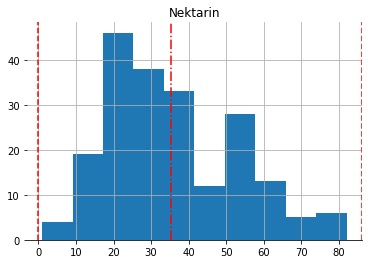

In [20]:
imp.reload(bon)
urun = dfx.Urun_Adi.drop_duplicates().sample(1).values[0]
_ = bon.urun_verim_aralik(dfx, urun,  draw_chart=True)
print(_)

In [21]:
imp.reload(bon)
dfa = bon.tum_aykiri_degerleri_duzelt(dfx,4)
dfa.head()

,Urun_Tipi,Il_Adi,Ilce_Adi,Urun_Adi,Ağaç,Meyvelik_Alan,Meyvelik_Alan_Olcu,Ekilen_Alan,Ekilen_Alan_Olcu,Hasat_Alan,Hasat_Alan_Olcu,Uretim_Miktar,Uretim_Olcu,Verim,Verim_Olcu,Urun_Miktar_CumSum
25002,Sebzeler,Mardin,Midyat,Acur,NaN,NaN,None,5800.0,Dekar,NaN,None,6384.0,Ton,1.100690,Ton/Dekar,0.157071
21599,Sebzeler,Gaziantep,Şehitkamil,Acur,NaN,NaN,None,1900.0,Dekar,NaN,None,4370.0,Ton,2.300000,Ton/Dekar,0.264590
30301,Sebzeler,Şanlıurfa,Viranşehir,Acur,NaN,NaN,None,1900.0,Dekar,NaN,None,3800.0,Ton,2.000000,Ton/Dekar,0.358085
24948,Sebzeler,Mardin,Artuklu,Acur,NaN,NaN,None,2000.0,Dekar,NaN,None,3200.0,Ton,1.600000,Ton/Dekar,0.436817
21545,Sebzeler,Gaziantep,Oğuzeli,Acur,NaN,NaN,None,1210.0,Dekar,NaN,None,2532.0,Ton,2.092562,Ton/Dekar,0.499114


### Özet Tablo Oluşturma

In [22]:
imp.reload(bon)
dfp = bon.ozet_tablo_olustur(dfa, path='../data')
dfp.head()

Urun_Adi          Acur  Adaçayı  Ahududu  Anason, İşlenmemiş  Armut  \
Il_Adi Ilce_Adi                                                       
Adana  Aladağ      NaN      NaN      NaN                 NaN   30.0   
       Ceyhan      NaN      NaN      NaN                 NaN   40.0   
       Feke        NaN      NaN      NaN                 NaN   20.0   
       Karaisalı   NaN      NaN      NaN                 NaN   25.0   
       Karataş     NaN      NaN      NaN                 NaN   45.0   

Urun_Adi          Arpa (Biralık)  Arpa (Diğer)  Arpa (Yeşilot)  Aspir Tohumu  \
Il_Adi Ilce_Adi                                                                
Adana  Aladağ                NaN         303.0             NaN           NaN   
       Ceyhan                NaN         311.0             NaN           NaN   
       Feke                  NaN         171.0             NaN           NaN   
       Karaisalı             NaN         233.0             NaN           NaN   
       Karataş               NaN         321.0             NaN           NaN   

Urun_Adi          Avokado  ...  İtalyan Çimi (Yemlik)  \
Il_Adi Ilce_Adi            ...                          
Adana  Aladağ         NaN  ...                    NaN   
       Ceyhan         NaN  ...                 2500.0   
       Feke           NaN  ...                    NaN   
       Karaisalı      NaN  ...                    NaN   
       Karataş        NaN  ...                    NaN   

Urun_Adi          İç Mekan Süs Bitkileri (Oda Bitkileri)  İğde  Şalgam  \
Il_Adi Ilce_Adi                                                          
Adana  Aladağ                                        NaN   NaN     NaN   
       Ceyhan                                        NaN   NaN     NaN   
       Feke                                          NaN   NaN     NaN   
       Karaisalı                                     NaN   NaN     NaN   
       Karataş                                       NaN   NaN     NaN   

Urun_Adi          Şam Fıstığı (Antep Fıstığı)  Şaraplık Üzümler  \
Il_Adi Ilce_Adi                                                   
Adana  Aladağ                             NaN               NaN   
       Ceyhan                             NaN               NaN   
       Feke                               NaN               NaN   
       Karaisalı                          NaN               NaN   
       Karataş                            NaN               NaN   

Urun_Adi          Şebboy, Kesme  Şeftali  Şeker Pancarı  \
Il_Adi Ilce_Adi                                           
Adana  Aladağ               NaN      NaN            NaN   
       Ceyhan               NaN     80.0            NaN   
       Feke                 NaN     10.0            NaN   
       Karaisalı            NaN     40.0            NaN   
       Karataş              NaN     50.0            NaN   

Urun_Adi          Şeker Pancarı Tohumları  
Il_Adi Ilce_Adi                            
Adana  Aladağ                         NaN  
       Ceyhan                         NaN  
       Feke                           NaN  
       Karaisalı                      NaN  
       Karataş                        NaN  

[5 rows x 203 columns]

### Özet Tablonun Normalizasyonu

In [23]:
imp.reload(bon)
dfn = bon.ozet_tablo_normalize(dfp)
dfn.head()

Urun_Adi          Acur  Adaçayı  Ahududu  Anason, İşlenmemiş     Armut  \
Il_Adi Ilce_Adi                                                          
Adana  Aladağ      NaN      NaN      NaN                 NaN  0.293715   
       Ceyhan      NaN      NaN      NaN                 NaN  0.391619   
       Feke        NaN      NaN      NaN                 NaN  0.195810   
       Karaisalı   NaN      NaN      NaN                 NaN  0.244762   
       Karataş     NaN      NaN      NaN                 NaN  0.440572   

Urun_Adi          Arpa (Biralık)  Arpa (Diğer)  Arpa (Yeşilot)  Aspir Tohumu  \
Il_Adi Ilce_Adi                                                                
Adana  Aladağ                NaN      0.548913             NaN           NaN   
       Ceyhan                NaN      0.563406             NaN           NaN   
       Feke                  NaN      0.309783             NaN           NaN   
       Karaisalı             NaN      0.422101             NaN           NaN   
       Karataş               NaN      0.581522             NaN           NaN   

Urun_Adi          Avokado  ...  İtalyan Çimi (Yemlik)  \
Il_Adi Ilce_Adi            ...                          
Adana  Aladağ         NaN  ...                    NaN   
       Ceyhan         NaN  ...                   0.25   
       Feke           NaN  ...                    NaN   
       Karaisalı      NaN  ...                    NaN   
       Karataş        NaN  ...                    NaN   

Urun_Adi          İç Mekan Süs Bitkileri (Oda Bitkileri)  İğde  Şalgam  \
Il_Adi Ilce_Adi                                                          
Adana  Aladağ                                        NaN   NaN     NaN   
       Ceyhan                                        NaN   NaN     NaN   
       Feke                                          NaN   NaN     NaN   
       Karaisalı                                     NaN   NaN     NaN   
       Karataş                                       NaN   NaN     NaN   

Urun_Adi          Şam Fıstığı (Antep Fıstığı)  Şaraplık Üzümler  \
Il_Adi Ilce_Adi                                                   
Adana  Aladağ                             NaN               NaN   
       Ceyhan                             NaN               NaN   
       Feke                               NaN               NaN   
       Karaisalı                          NaN               NaN   
       Karataş                            NaN               NaN   

Urun_Adi          Şebboy, Kesme   Şeftali  Şeker Pancarı  \
Il_Adi Ilce_Adi                                            
Adana  Aladağ               NaN       NaN            NaN   
       Ceyhan               NaN  0.829101            NaN   
       Feke                 NaN  0.103638            NaN   
       Karaisalı            NaN  0.414551            NaN   
       Karataş              NaN  0.518188            NaN   

Urun_Adi          Şeker Pancarı Tohumları  
Il_Adi Ilce_Adi                            
Adana  Aladağ                         NaN  
       Ceyhan                         NaN  
       Feke                           NaN  
       Karaisalı                      NaN  
       Karataş                        NaN  

[5 rows x 203 columns]

In [24]:
pd.concat([dfp.loc[:,'Fındık'], dfn.loc[:,['Fındık']].rename(columns={'Fındık':'Fındık_n'})],axis=1)\
    .dropna().sort_values('Fındık', ascending=False) \
    .query("Il_Adi=='Ordu'")



Fındık  Fındık_n
Il_Adi Ilce_Adi                    
Ordu   Kabataş        2.0  0.201816
       Altınordu      2.0  0.201816
       Gülyalı        2.0  0.201816
       Gürgentepe     1.0  0.100908
       Çaybaşı        1.0  0.100908
       Fatsa          1.0  0.100908
       Gölköy         1.0  0.100908
       İkizce         1.0  0.100908
       Ünye           1.0  0.100908
       Çatalpınar     1.0  0.100908
       Çamaş          1.0  0.100908
       Ulubey         1.0  0.100908
       Perşembe       1.0  0.100908
       Mesudiye       1.0  0.100908
       Kumru          1.0  0.100908
       Korgan         1.0  0.100908
       Aybastı        1.0  0.100908
       Akkuş          1.0  0.100908
       Kabadüz        1.0  0.100908

### Verim Değerlerini Normalize Etme

In [25]:
# ozet_tablo_olustur içerisinde

# Algoritma

## Benzerlik

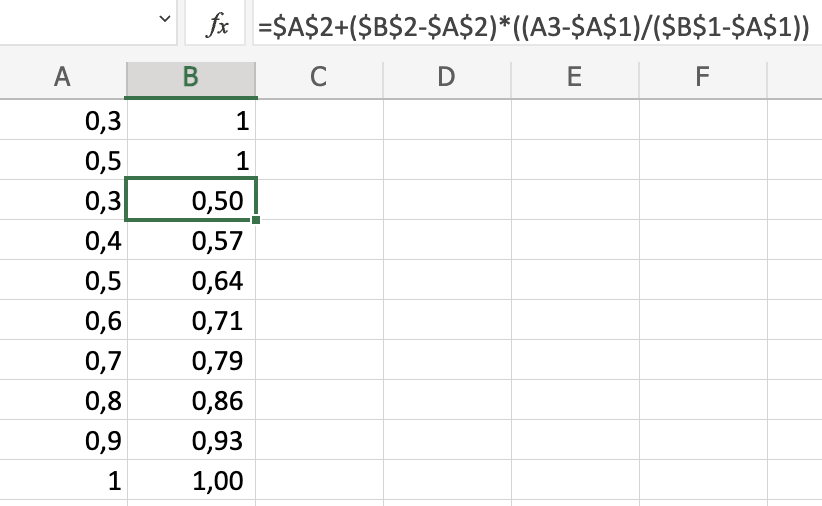

In [26]:
import scipy
print(scipy.__version__)

1.6.2


In [27]:
imp.reload(bon)
ilceler = {ilce:il for (il,ilce) in dfs[['Il_Adi','Ilce_Adi']].drop_duplicates().values}

kontrol_ilce='Hani'
ilce ='Buharkent'
#ilce_skor = [[ilceler[ilce], ilce, bon.similarity(dfn, kontrol_ilce, ilce)] for ilce in ilceler.keys() ]
pd.DataFrame(ilce_skor, columns=['Il_Adi','Ilce_Adi','Skor']).sort_values('Skor', ascending=False).iloc[-15:]


NameError: name 'ilce_skor' is not defined

In [28]:
pd.pivot_table(
    dfs[(dfs.Ilce_Adi.isin([kontrol_ilce,ilce])) & (dfs.Urun_Olcum.isin(['Üretim Miktarı', 'Verim']))][['Il_Adi','Ilce_Adi','Urun_Adi','Miktar','Urun_Olcum']].dropna(), 
    index='Urun_Adi', 
    columns=['Il_Adi','Ilce_Adi','Urun_Olcum'], 
    values='Miktar', 
    aggfunc='sum').dropna()


Il_Adi                          Aydın                Diyarbakır               
Ilce_Adi                    Buharkent                      Hani               
Urun_Olcum                      Verim Üretim Miktarı      Verim Üretim Miktarı
Urun_Adi                                                                      
Arpa (Diğer)                    245.0          209.0      288.0        15941.0
Buğday, Durum Buğdayı Hariç     327.0          735.0      340.0          335.0
Ceviz                            25.0           55.0       25.0          120.0
Diğer Elmalar                    36.0          351.0       32.0          946.0
Elma (Golden)                    50.0         1180.0       20.0           11.0
Elma (Starking)                  50.0         1071.0       19.0            3.0
Erik                             35.0          318.0       16.0           23.0
Fiğ (Adi) (Yeşil Ot)           1800.0         1386.0     1700.0        13940.0
Mısır (Slaj)                   5831.0         7055.0     3000.0         1110.0
Sofralık Üzüm, Çekirdekli      1201.0          778.0      850.0        14450.0
Yonca (Yeşilot)                7500.0        13125.0     1800.0          846.0
İncir (Yaş)                      23.0         6195.0       15.0           22.0
Şam Fıstığı (Antep Fıstığı)       6.0            1.0        6.0            2.0

In [29]:
import itertools
import pandas as pd
#ilceler = np.random.choice(dfn.index, 10)
ilceler = [('Eskişehir', 'Sarıcakaya'),('Tekirdağ', 'Çorlu'),('Diyarbakır', 'Eğil'),
 ('Konya', 'Bozkır'),('İstanbul', 'Sarıyer'),('Balıkesir', 'Sındırgı'),
 ('Kayseri', 'Özvatan'),('Çanakkale', 'Gelibolu'),('Ordu', 'İkizce'),
 ('İzmir', 'Beydağ')]
print(ilceler)
df_sim = pd.DataFrame(list(itertools.product(ilceler, ilceler,[1])), columns=['Ilce1','Ilce2','Sim'])
df_sim = df_sim.assign(Sim = lambda x: x.apply(lambda y: bon.similarity(dfn, y.Ilce1[1], y.Ilce2[1]), axis=1))
df_sim = df_sim.pivot_table(index='Ilce1', columns='Ilce2', values='Sim')
df_sim.style.background_gradient(axis=None, vmin=-1, vmax=1, cmap='RdYlGn') \
    .applymap(lambda x: 'background:transparent' if pd.isnull(x) else '')

[('Eskişehir', 'Sarıcakaya'), ('Tekirdağ', 'Çorlu'), ('Diyarbakır', 'Eğil'), ('Konya', 'Bozkır'), ('İstanbul', 'Sarıyer'), ('Balıkesir', 'Sındırgı'), ('Kayseri', 'Özvatan'), ('Çanakkale', 'Gelibolu'), ('Ordu', 'İkizce'), ('İzmir', 'Beydağ')]


Ilce2,"('Balıkesir', 'Sındırgı')","('Diyarbakır', 'Eğil')","('Eskişehir', 'Sarıcakaya')","('Kayseri', 'Özvatan')","('Konya', 'Bozkır')","('Ordu', 'İkizce')","('Tekirdağ', 'Çorlu')","('Çanakkale', 'Gelibolu')","('İstanbul', 'Sarıyer')","('İzmir', 'Beydağ')"
Ilce1,,,,,,,,,,
"('Balıkesir', 'Sındırgı')",0.000000,0.285720,0.001250,-0.074642,0.226353,-0.443708,0.172714,0.012460,0.082915,0.133701
"('Diyarbakır', 'Eğil')",0.285720,0.000000,-0.244391,0.000000,0.000000,-0.455382,0.406381,0.127661,-0.086689,0.355864
"('Eskişehir', 'Sarıcakaya')",0.001250,-0.244391,0.000000,-0.086589,-0.143603,-0.263738,-0.336502,0.000000,0.415741,0.252183
"('Kayseri', 'Özvatan')",-0.074642,0.000000,-0.086589,0.000000,0.000000,0.296956,0.218593,0.194039,-0.374087,0.154146
"('Konya', 'Bozkır')",0.226353,0.000000,-0.143603,0.000000,0.000000,-0.103552,0.399891,0.234990,0.213221,0.000000
"('Ordu', 'İkizce')",-0.443708,-0.455382,-0.263738,0.296956,-0.103552,0.000000,-0.426624,0.000000,-0.147219,0.116576
"('Tekirdağ', 'Çorlu')",0.172714,0.406381,-0.336502,0.218593,0.399891,-0.426624,0.000000,0.000000,0.540643,0.003778
"('Çanakkale', 'Gelibolu')",0.012460,0.127661,0.000000,0.194039,0.234990,0.000000,0.000000,0.000000,-0.336566,0.153967
"('İstanbul', 'Sarıyer')",0.082915,-0.086689,0.415741,-0.374087,0.213221,-0.147219,0.540643,-0.336566,0.000000,0.189197


In [30]:
dfn[dfn.index.isin([ 'Sarıcakaya','Sarıyer'], level=1)].T.dropna().style.background_gradient(axis=None)

Il_Adi,Eskişehir,İstanbul
Ilce_Adi,Sarıcakaya,Sarıyer
Urun_Adi,,
Ayva,0.299616,0.167785
Biber (Sivri),0.809608,0.363802
Ceviz,0.422952,0.211476
Diğer Elmalar,0.339246,0.145391
Domates (Sofralık),0.477028,0.220783
Dut,0.969932,0.145490
Elma (Starking),0.270618,0.067654
Erik,0.333704,0.155729


## Data Hazırla

In [10]:
import imp
imp.reload(bon)
dfs = bon.create_dataset(path='../data', reload=False)
dfs = bon.coklama_temizle(dfs)
sus_verim = bon.eksiveri_sus_verim(dfs)
sebze_verim = bon.eksikveri_sebze_verim(dfs)
dfe = bon.eksikleri_birlestir([dfs, sus_verim, sebze_verim])
dfx = bon.urun_dataset(dfe, refresh=True, path='../data')
print(dfx.shape)
dfx = bon.sifirkayit_duzeltme(dfx)
print(dfx.shape)
dfx = bon.nadir_urunler(dfx, n=20)
#print(dfx.shape)
#dfx = dfx[~dfx.Urun_Adi.isin(['Çay Yaprakları'])]
#print(dfx.shape)
#dfx = dfx[~dfx.Il_Adi.isin(['Iğdır'])]
print(dfx.shape)
dfa = bon.tum_aykiri_degerleri_duzelt(dfx,4)
dfa = dfa[dfa.Urun_Miktar_CumSum<0.99]
print(dfa.shape)
dfp = bon.ozet_tablo_olustur(dfa, path='../data')
dfn = bon.ozet_tablo_normalize(dfp)
df_verim = bon.ozet_tablo_oneri_format(dfn)
print(df_verim.shape)

4819 adet çoklayan kayıt silindi
Birleştirilen veri seti adeti: 3
Kayıt adetleri: 606245,369,14503
Eksik değere sahip gözlem adeti 441348
Sonuç veri seti gözlem adeti (179769, 10)
Ana tablo oluşturuldu: (44692, 16)
(44692, 16)
Sebzeler - Ekili Alan=0: 8
Üretim miktarı sıfırdan büyük olup verim oranı 0 olan kayıtlar: 12
Üretim miktarı sıfırdan büyük olup verim oranı 0 olan kayıtlar: 430
(44242, 16)
Silinen gözlem adet 431
(43811, 16)
(26403, 16)
(26403, 3)


## Ürün Bilgileri

In [32]:
#df = pd.DataFrame([['test','deneme 123']], columns=['Urun_Adi','Urun_Aciklama'])
#df = pd.read_pickle('../app/static/data/df_urunbilgi.pkl')
#df

## Surprise

https://www.jiristodulka.com/post/recsys_cf/

In [33]:
df_verim_filter = df_verim.merge(
    dfx.assign(**{'uid': lambda x: x.apply(lambda y: y.Il_Adi+'_'+y.Ilce_Adi, axis=1),
                  'iid': lambda x: x.Urun_Adi
                 }).loc[:,['uid','iid','Urun_Miktar_CumSum']],
    on=['uid','iid']
).query('Urun_Miktar_CumSum<0.99').loc[:,['uid','iid','rating']]

In [34]:
display(dfx[dfx.Urun_Miktar_CumSum<0.99].shape)
display(dfx[dfx.Urun_Miktar_CumSum>=0.99].shape)
display(dfx[dfx.Urun_Miktar_CumSum.isna()].shape)
display(dfx[~dfx.Urun_Miktar_CumSum.isna()].shape)
dfx.shape

(26403, 16)

(17408, 16)

(0, 16)

(43811, 16)

(43811, 16)

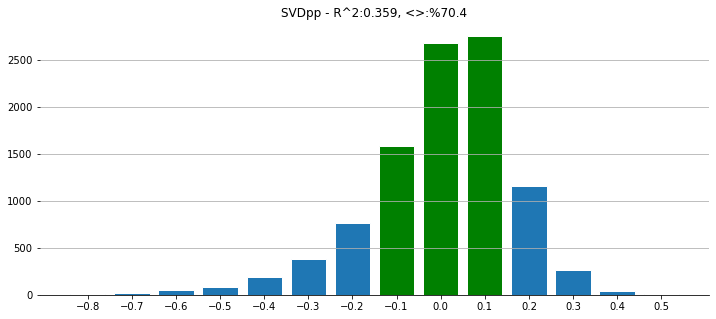

In [35]:
imp.reload(bon)
cls_rcm = bon.cls_recommend()
df_bt = cls_rcm.algorithm_backtest(
    algorithm_name='SVDpp',
    df=df_verim_filter, 
    rating_scale=(0,1), 
    n_factors=20,
    test_size=10000, test_treshold=0.1,
    display_chart=True
)

In [38]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, r2_score
import numpy as np

def get_roc_score(t = 0.32):
    try:
        df_btx = df_bt.assign(**{'y_hat': lambda x: x.apply(lambda x: 1 if x['rating']>t else 0, axis=1),
                        'y_pred': lambda x: x.apply(lambda x: 1 if x['est']>t else 0, axis=1)
                       })
        return roc_auc_score(df_btx.y_hat, df_btx.y_pred)
    except:
        return 0
t = np.argmax([get_roc_score(t/100) for t in range(1,101)])
print('t:',t/100, 'roc:', get_roc_score(t/100))

t: 0.36 roc: 0.7318698537307621


In [39]:
df_bt[df_bt.Error_Net.abs()<=0.4].groupby('Error_Net').apply(lambda x: pd.Series({
    'A':round(min(x.rating-x.est),2), 
    'B': len(x),
    'C': round(r2_score(x.est, x.rating),2)
}))

,A,B,C
Error_Net,,,
-0.4,0.35,186.0,-14.11
-0.3,0.25,378.0,-5.71
-0.2,0.15,770.0,-1.77
-0.1,0.05,1584.0,0.37
0.0,-0.05,2688.0,0.95
0.1,-0.15,2759.0,0.33
0.2,-0.25,1156.0,-1.79
0.3,-0.35,268.0,-6.96
0.4,-0.44,44.0,-13.16


In [40]:
df_bt[(df_bt.iid.str.contains('Ahududu'))].assign(Error_Net_Abs=lambda x: x.Error_Net.abs())\
    .set_index(['iid','uid']) \
    .sort_values(['Error_Net_Abs','Error_Net'], ascending=(False,True)) \
    .style.background_gradient(subset='Error_Net_Abs', cmap='RdYlGn_r') \
    .format('{:,.2f}')

### df_final

In [41]:
columns = ['Il_Adi','Ilce_Adi','Urun_Tipi','Urun_Adi',
          'Uretim_Miktar','Uretim_Olcu', 'Verim', 'Verim_Olcu',
          'prediction','rating','rating_actual','Urun_Miktar_CumSum']
df_final = \
    pd.concat([
            # train datası ile predict datası birleştirilir 
            cls_rcm.df.assign(prediction=0),
            cls_rcm.predictions.drop('rank', axis=1).rename(columns={'est':'rating'}).assign(prediction=1)
          ]) \
    .assign(
           # train-predict tablosunda uid olarak tutulan il-ilçe adlarını ayrıştır
            **{'Il_Adi': lambda x: x.uid.apply(lambda x: x.split('_')[0]),
               'Ilce_Adi': lambda x: x.uid.apply(lambda x: x.split('_')[1])
              }) \
    .merge(
            # sonuç tablosu ile ürün adlarını birleştir,
            # Ürün Tipi'ni buradan alıyoruz
            dfs[['Urun_Tipi','Urun_Adi']].drop_duplicates(),
            how='left',
            left_on='iid', right_on='Urun_Adi',
            suffixes=['_a',None]
          ) \
    .merge(
           # oluşan sonuç tablosu ile verimlilik tablosunu birleştir, 
           # train-predict datasındaki ratinglerle gerçek datadaki ratingleri yanyana getir 
           df_verim,
           how='left',
           left_on=['iid','uid'], right_on=['iid','uid'],
           suffixes=[None,'_actual'],
          ) \
    .merge(
            # train-predict sonuç tablosu ile ürün bazlı pivot tabloyu birleştir
            # üretim miktarı, üretim birimi, gerçek verim miktarını bu tablodan alıyoruz
            dfx.iloc[:,[0,1,2,3,11,12,13,14,15]],
            how='left',
            left_on=['iid','Il_Adi','Ilce_Adi'], right_on=['Urun_Adi','Il_Adi','Ilce_Adi'],
            suffixes=[None, '_x']
          ).drop(['Urun_Tipi_x','Urun_Adi_x'], axis=1) \
    [columns]

print(df_final.shape)
df_final.to_pickle('../app/static/data/df_final.pkl')


(170398, 12)


In [42]:
df_final[~df_final.Urun_Miktar_CumSum.isna()].shape

(53640, 12)

In [43]:
from sklearn.metrics import r2_score, roc_auc_score

urun='Ahududu'
df_findik_prd = df_final[(df_final.prediction==1) & (df_final.rating_actual>0) & (df_final.Urun_Adi==urun)].sort_values('Uretim_Miktar',ascending=False)
print('Fındık shape:', df_findik_prd.shape[0])
print('Fındık r2:', r2_score(
    df_findik_prd.loc[:, 'rating'],
    df_findik_prd.loc[:, 'rating_actual']
))
print('Fındık roc:', roc_auc_score(
    df_findik_prd.loc[:, 'rating_actual'].apply(lambda x: 1 if x>0.60 else 0),
    df_findik_prd.loc[:, 'rating']
))

display(df_findik_prd)


Fındık shape: 5
Fındık r2: -5.119296335943006
Fındık roc: 1.0


,Il_Adi,Ilce_Adi,Urun_Tipi,Urun_Adi,Uretim_Miktar,Uretim_Olcu,Verim,Verim_Olcu,prediction,rating,rating_actual,Urun_Miktar_CumSum
53168,Bursa,Kestel,Meyveler Içecek Ve Baharat Bitkileri,Ahududu,2100.0,Ton,700.0,Kg/Dekar,1,0.549905,0.402068,0.778512
69241,Bursa,İnegöl,Meyveler Içecek Ve Baharat Bitkileri,Ahududu,522.0,Ton,900.0,Kg/Dekar,1,0.493298,0.516944,0.874380
98370,Bursa,Orhaneli,Meyveler Içecek Ve Baharat Bitkileri,Ahududu,500.0,Ton,1000.0,Kg/Dekar,1,0.411897,0.574383,0.966208
35302,Bursa,Yıldırım,Meyveler Içecek Ve Baharat Bitkileri,Ahududu,47.0,Ton,1741.0,Kg/Dekar,1,0.648810,1.000000,0.974839
55200,Isparta,Merkez,Meyveler Içecek Ve Baharat Bitkileri,Ahududu,38.0,Ton,760.0,Kg/Dekar,1,0.541746,0.436531,0.981818


### df_ozet

In [86]:
kat1 = df_final[(df_final.rating>0.10)]
kat1_a = kat1[~kat1.Uretim_Miktar.isna()].sort_values('rating', ascending=False) \
            .groupby(['Il_Adi','Urun_Tipi','Urun_Adi']).apply(lambda x: pd.Series({
                'ilçe_a': x.Ilce_Adi.drop_duplicates().shape[0],
                'miktar': x.Uretim_Miktar.sum(),
                'verim_a': (x.rating*x.Uretim_Miktar).sum() / x.Uretim_Miktar.sum()
            })) 

kat1_b = kat1[kat1.Uretim_Miktar.isna()].sort_values('rating', ascending=False) \
            .groupby(['Il_Adi','Urun_Tipi','Urun_Adi']).apply(lambda x: pd.Series({
                'ilçe_b': x.Ilce_Adi.drop_duplicates().shape[0],
                'verim_b': x.rating.mean()
            })) 
df_ozet = \
pd.concat([kat1_a, kat1_b], axis=1)\
    .assign(ort= lambda x: x.apply(lambda y: np.mean(y.loc[['verim_a','verim_b']]), axis=1) ) \
    .assign(Uretim_Sira=lambda x: x.groupby('Urun_Adi')['miktar'].rank(method='dense', ascending=False)) \
    .assign(Verim_Sira=lambda x: x.groupby('Urun_Adi')['verim_a'].rank(method='dense', ascending=False)) \
    .assign(Tahmin_Sira=lambda x: x.groupby('Urun_Adi')['verim_b'].rank(method='dense', ascending=False)) \
    .sort_values(['ort','miktar'], ascending=[False,False])\
    .reset_index()
df_ozet.to_pickle('../app/static/data/df_ozet.pkl')

### Başarısız Sonuçlar

In [87]:
df_final[df_final.prediction==0]

,Il_Adi,Ilce_Adi,Urun_Tipi,Urun_Adi,Uretim_Miktar,Uretim_Olcu,Verim,Verim_Olcu,prediction,rating,rating_actual,Urun_Miktar_CumSum
0,Adıyaman,Gerger,Sebzeler,Acur,49.0,Ton,0.98,Ton/Dekar,0,0.217778,0.217778,0.985484
1,Aksaray,Merkez,Sebzeler,Acur,160.0,Ton,1.60,Ton/Dekar,0,0.355556,0.355556,0.951776
2,Antalya,Elmalı,Sebzeler,Acur,1500.0,Ton,3.00,Ton/Dekar,0,0.666667,0.666667,0.695453
3,Antalya,Korkuteli,Sebzeler,Acur,45.0,Ton,3.00,Ton/Dekar,0,0.666667,0.666667,0.986591
4,Aydın,Bozdoğan,Sebzeler,Acur,61.0,Ton,3.05,Ton/Dekar,0,0.677778,0.677778,0.978914
...,...,...,...,...,...,...,...,...,...,...,...,...
26398,Çorum,Merkez,Tahıllar Ve Diğer Bitkisel Ürünler,Şeker Pancarı,70679.0,Ton,5996.00,Kg/Dekar,0,0.474367,0.474367,0.834300
26399,Çorum,Sungurlu,Tahıllar Ve Diğer Bitkisel Ürünler,Şeker Pancarı,59722.0,Ton,6142.00,Kg/Dekar,0,0.485918,0.485918,0.851201
26400,Çorum,İskilip,Tahıllar Ve Diğer Bitkisel Ürünler,Şeker Pancarı,36026.0,Ton,6857.00,Kg/Dekar,0,0.542484,0.542484,0.920399
26401,Şanlıurfa,Bozova,Tahıllar Ve Diğer Bitkisel Ürünler,Şeker Pancarı,133228.0,Ton,8253.00,Kg/Dekar,0,0.652927,0.652927,0.640538


In [88]:
df_yuksek = df_final[(df_final.Uretim_Miktar>0) 
                     & (df_final.prediction==1) 
                     #& (df_final.rating>df_final.rating_actual+0.10) 
                     & df_final.Urun_Adi.str.contains('Kiraz')] \
    .groupby(['Urun_Tipi','Urun_Adi','Il_Adi','Ilce_Adi']).apply(lambda x: pd.Series({
        'ilçe adet': x.Ilce_Adi.drop_duplicates().shape[0],
        'mevcut_ort': x.rating_actual.mean(),
        'tahmin ort': x.rating.mean(),
        'fark': (abs(x.rating_actual-x.rating)).sum()/x.shape[0]
    })).sort_values('fark',ascending=False) \
    .query("mevcut_ort>0")
print(df_yuksek.shape)
df_yuksek.head(25)

(161, 4)


ilçe adet  \
Urun_Tipi                            Urun_Adi Il_Adi         Ilce_Adi                     
Meyveler Içecek Ve Baharat Bitkileri Kiraz    Afyonkarahisar Sultandağı             1.0   
                                              Kayseri        Yeşilhisar             1.0   
                                              Çanakkale      Merkez                 1.0   
                                                             Biga                   1.0   
                                              Ankara         Akyurt                 1.0   
                                              Karaman        Başyayla               1.0   
                                              Malatya        Doğanşehir             1.0   
                                              Iğdır          Karakoyunlu            1.0   
                                              Balıkesir      Bandırma               1.0   
                                              Sinop          Boyabat                1.0   
                                              Eskişehir      Odunpazarı             1.0   
                                              Nevşehir       Ürgüp                  1.0   
                                              Niğde          Ulukışla               1.0   
                                              Ordu           Çaybaşı                1.0   
                                              Aydın          Kuyucak                1.0   
                                              Kocaeli        Gebze                  1.0   
                                              Nevşehir       Merkez                 1.0   
                                              Tekirdağ       Marmaraereğlisi        1.0   
                                              Manisa         Kula                   1.0   
                                              Bursa          Orhangazi              1.0   
                                              Isparta        Uluborlu               1.0   
                                              Kayseri        Develi                 1.0   
                                              Konya          Doğanhisar             1.0   
                                              Ankara         Güdül                  1.0   
                                              Kırklareli     Vize                   1.0   

                                                                              mevcut_ort  \
Urun_Tipi                            Urun_Adi Il_Adi         Ilce_Adi                      
Meyveler Içecek Ve Baharat Bitkileri Kiraz    Afyonkarahisar Sultandağı         0.755382   
                                              Kayseri        Yeşilhisar         0.755382   
                                              Çanakkale      Merkez             0.906459   
                                                             Biga               0.780562   
                                              Ankara         Akyurt             0.629485   
                                              Karaman        Başyayla           0.075538   
                                              Malatya        Doğanşehir         0.692434   
                                              Iğdır          Karakoyunlu        0.893869   
                                              Balıkesir      Bandırma           0.138487   
                                              Sinop          Boyabat            0.654664   
                                              Eskişehir      Odunpazarı         0.251794   
                                              Nevşehir       Ürgüp              0.100718   
                                              Niğde          Ulukışla           0.629485   
                                              Ordu           Çaybaşı            0.629485   
                                              Aydın          Kuyucak            0.264384   
                                              Kocaeli   

In [47]:
df_dusuk = df_final[(df_final.Uretim_Miktar>0) & (df_final.prediction==1) & (df_final.rating<df_final.rating_actual-0.10)] \
    .groupby(['Urun_Tipi','Urun_Adi','Il_Adi','Ilce_Adi']).apply(lambda x: pd.Series({
        'ilçe adet': x.Ilce_Adi.drop_duplicates().shape[0],
        'mevcut ort': x.rating_actual.mean(),
        'tahmin ort': x.rating.mean(),
        'fark': (abs(x.rating_actual-x.rating)).sum()/x.shape[0]
    })).sort_values('fark',ascending=False) 
print(df_dusuk.shape)
df_dusuk.head(15).sort_index()

(2145, 4)


ilçe adet  \
Urun_Tipi                            Urun_Adi                                   Il_Adi     Ilce_Adi                
Meyveler Içecek Ve Baharat Bitkileri Diğer Elmalar                              Kars       Sarıkamış         1.0   
                                     Dut                                        Ordu       Gülyalı           1.0   
                                     Elma (Granny Smith)                        Kayseri    Yeşilhisar        1.0   
                                     Kayısı                                     Kars       Sarıkamış         1.0   
                                     Trabzon Hurması (Cennet Elması)            Adıyaman   Gölbaşı           1.0   
                                     Yağlık Zeytinler (Zeytinyağı Üretimi İçin) Denizli    Buldan            1.0   
                                     İğde                                       Diyarbakır Yenişehir         1.0   
                                     Şaraplık Üzümler                           İzmir      Menemen           1.0   
Sebzeler                             Domates (Sofralık)                         Tekirdağ   Ergene            1.0   
                                     Hıyar (Sofralık)                           Burdur     Gölhisar          1.0   
                                                                                Manisa     Akhisar           1.0   
                                                                                İzmir      Menderes          1.0   
                                     Roka                                       Denizli    Tavas             1.0   
Süs Bitkileri                        İç Mekan Süs Bitkileri (Oda Bitkileri)     Bursa      Osmangazi         1.0   
Tahıllar Ve Diğer Bitkisel Ürünler   Tütün, İşlenmemiş                          Batman     Beşiri            1.0   

                                                                                                       mevcut ort  \
Urun_Tipi                            Urun_Adi                                   Il_Adi     Ilce_Adi                 
Meyveler Içecek Ve Baharat Bitkileri Diğer Elmalar                              Kars       Sarıkamış     1.000000   
                                     Dut                                        Ordu       Gülyalı       1.000000   
                                     Elma (Granny Smith)                        Kayseri    Yeşilhisar    1.000000   
                                     Kayısı                                     Kars       Sarıkamış     0.928278   
                                     Trabzon Hurması (Cennet Elması)            Adıyaman   Gölbaşı       1.000000   
                                     Yağlık Zeytinler (Zeytinyağı Üretimi İçin) Denizli    Buldan        1.000000   
                                     İğde                                       Diyarbakır Yenişehir     1.000000   
                                     Şaraplık Üzümler                           İzmir      Menemen       0.929512   
Sebzeler                             Domates (Sofralık)                         Tekirdağ   Ergene        1.000000   
                                     Hıyar (Sofralık)                           Burdur     Gölhisar      0.997620   
                                                                                Manisa     Akhisar       1.000000   
                                                                                İzmir      Menderes      1.000000   
                                     Roka                                       Denizli    Tavas         1.000000   
Süs Bitkileri                        İç Mekan Süs Bitkileri (Oda Bitkileri)     Bursa      Osmangazi     1.000000   
Tahıllar Ve Diğer Bitkisel Ürünler   Tütün, İşlenmemiş                          Batman     Beşiri        1.000000   

                                                                                                       tahmin ort  \
Urun_Tipi              

### Başarılı Sonuçlar

In [48]:
df_benzer = df_final[(df_final.Uretim_Miktar>0) & (df_final.prediction==1) & (abs(df_final.rating-df_final.rating_actual)<=0.10)] \
    .groupby(['Urun_Tipi','Urun_Adi']).apply(lambda x: pd.Series({
        'ilçe adet': x.Ilce_Adi.drop_duplicates().shape[0],
        'mevcut ort': x.rating_actual.mean(),
        'tahmin ort': x.rating.mean(),
        'fark': (abs(x.rating_actual-x.rating)).sum()/x.shape[0]
    })).sort_values('fark',ascending=False)
print(df_benzer.shape)
df_benzer.head(15).sort_index()

(170, 4)


ilçe adet  \
Urun_Tipi                            Urun_Adi                                            
Meyveler Içecek Ve Baharat Bitkileri Greyfurt (Altıntop)                           2.0   
                                     Kekik, İşlenmemiş                             2.0   
                                     Keçiboynuzu (Harnup)                          3.0   
                                     Limon Ve Misket Limonu                        5.0   
                                     Mandalina (Klemantin)                         1.0   
Sebzeler                             Brokoli                                       9.0   
                                     Mantar (Kültür)                               7.0   
                                     Pazı                                          3.0   
                                     Semizotu                                      8.0   
Süs Bitkileri                        Gül, Kesme                                    3.0   
                                     İç Mekan Süs Bitkileri (Oda Bitkileri)        4.0   
Tahıllar Ve Diğer Bitkisel Ürünler   Arpa (Yeşilot)                                8.0   
                                     Bezelye, Kuru                                 5.0   
                                     Börülce, Kuru                                 4.0   
                                     Darı                                          3.0   

                                                                             mevcut ort  \
Urun_Tipi                            Urun_Adi                                             
Meyveler Içecek Ve Baharat Bitkileri Greyfurt (Altıntop)                       0.418182   
                                     Kekik, İşlenmemiş                         0.340000   
                                     Keçiboynuzu (Harnup)                      0.444444   
                                     Limon Ve Misket Limonu                    0.682667   
                                     Mandalina (Klemantin)                     0.300000   
Sebzeler                             Brokoli                                   0.677788   
                                     Mantar (Kültür)                           0.203056   
                                     Pazı                                      0.388889   
                                     Semizotu                                  0.263809   
Süs Bitkileri                        Gül, Kesme                                0.377778   
                                     İç Mekan Süs Bitkileri (Oda Bitkileri)    0.119908   
Tahıllar Ve Diğer Bitkisel Ürünler   Arpa (Yeşilot)                            0.443333   
                                     Bezelye, Kuru                             0.390800   
                                     Börülce, Kuru                             0.591760   
                                     Darı                                      0.677647   

                                                                             tahmin ort  \
Urun_Tipi                            Urun_Adi                                             
Meyveler Içecek Ve Baharat Bitkileri Greyfurt (Altıntop)                       0.437651   
                                     Kekik, İşlenmemiş                         0.343440   
                                     Keçiboynuzu (Harnup)                      0.467079   
                                     Limon Ve Misket Limonu                    0.708389   
                                     Mandalina (Klemantin)                     0.367799   
Sebzeler                             Brokoli                                   0.659436   
                                     Mantar (Kültür)                           0.202607   
                                     Pazı                                      0.461398   
                                     Semizotu                                  0.272698 

In [49]:
df_final[(df_final.Urun_Adi=='Kekik, İşlenmemiş') & (df_final.Uretim_Miktar>0)].groupby('Il_Adi').Uretim_Miktar.sum().sort_values(ascending=False)

Il_Adi
Denizli           30345.0
Manisa              796.0
Uşak                738.0
Antalya             314.0
Aydın               246.0
Kütahya             203.0
Hatay               189.0
Muğla               118.0
Samsun               59.0
Burdur               53.0
Afyonkarahisar       42.0
Bursa                 6.0
Eskişehir             3.0
Konya                 3.0
İzmir                 2.0
Isparta               2.0
Düzce                 2.0
Ankara                2.0
Karaman               1.0
Balıkesir             1.0
Adana                 1.0
Name: Uretim_Miktar, dtype: float64

### Özet Başarı

In [50]:
df_final.groupby(['Urun_Tipi']).apply(lambda x: pd.Series({
    'ilçe_adet': x[x.Uretim_Miktar>0].Ilce_Adi.drop_duplicates().shape[0],
    'ort_verim': (x.rating_actual.mean()),
    'thm_verim': (x.rating.mean()),
    'test_adet': x[(x.Uretim_Miktar>0) & (x.prediction==1)].shape[0],
    'başarılı' : x[(x.Uretim_Miktar>0) & (x.prediction==1)] \
                .apply(lambda x: 1 if abs(x.rating-x.rating_actual)<=0.1 else 0, axis=1).sum(),
    'skor': x[(x.Uretim_Miktar>0) & (x.prediction==1)] \
                .apply(lambda x: 1 if abs(x.rating-x.rating_actual)<=0.1 else 0, axis=1).sum() / 
            x[(x.Uretim_Miktar>0) & (x.prediction==1)].shape[0],
    'skor r2': None if       x[(x.Uretim_Miktar>0) & (x.prediction==1)].shape[0]<3
               else r2_score(x[(x.Uretim_Miktar>0) & (x.prediction==1)].rating, 
                             x[(x.Uretim_Miktar>0) & (x.prediction==1)].rating_actual)
})).query("""test_adet>0""") \
    .sort_values('skor', ascending=False) 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### örnek

In [51]:
il='kastamonu'
urun_tipi='Meyveler Içecek Ve Baharat Bitkileri'
dfo = df_ozet.query(f"""(Il_Adi.str.lower()=='{il}') & (Urun_Tipi=='{urun_tipi}')""")
dfo.iloc[:10,2:6]#.values.tolist()

dfo = df_ozet.query(f"""(Il_Adi.str.lower()=='{il}') & (Urun_Tipi=='Meyveler Içecek Ve Baharat Bitkileri')""")
print('il',il,'meyveler:',dfo.shape)
meyveler_act = dfo.iloc[:10,2:10]#.values.tolist()
meyveler_act

il kastamonu meyveler: (57, 9)


,Urun_Adi,ilçe_a,miktar,verim_a,ilçe_b,verim_b,ort
1170,Çay Yaprakları,NaN,NaN,NaN,20.0,0.617821,0.617821
1595,"Muz, Plantain Ve Benzerleri",NaN,NaN,NaN,20.0,0.591588,0.591588
2135,"Kimyon, İşlenmemiş",NaN,NaN,NaN,20.0,0.563950,0.563950
2696,Kivi,6.0,526.0,0.549052,14.0,0.528962,0.539007
2732,"Biber, Kuru, İşlenmemiş",NaN,NaN,NaN,20.0,0.537804,0.537804
3041,"Kurutmalık Üzüm, Çekirdeksiz",NaN,NaN,NaN,20.0,0.526107,0.526107
4100,Limon Ve Misket Limonu,NaN,NaN,NaN,20.0,0.490982,0.490982
4103,Avokado,NaN,NaN,NaN,20.0,0.490893,0.490893
5212,Nektarin,NaN,NaN,NaN,20.0,0.457976,0.457976
5252,Ahududu,NaN,NaN,NaN,20.0,0.456731,0.456731


In [52]:
col = 'Kivi'
dfn.loc['Kastamonu',[col]].sort_values(col, ascending=False)#[(dfx.Il_Adi=='Antalya') & (dfx.Urun_Adi.str.contains('Starking'))]


Urun_Adi,Kivi
Ilce_Adi,
Doğanyurt,0.800000
Bozkurt,0.528571
İnebolu,0.500000
Abana,0.428571
Araç,NaN
Azdavay,NaN
Ağlı,NaN
Cide,NaN
Daday,NaN


## Görselleştirme

In [53]:
print(a)

1


### Kategori bazında yetişen / potansiyel ürünler

In [54]:
kategoriler = df_final.Urun_Tipi.drop_duplicates()
il = 'antalya'




In [55]:
df_ozet[df_ozet.Urun_Adi=='Karanfil, Kesme'].sort_values('ort', ascending=False).iloc[:20,]

,Il_Adi,Urun_Tipi,Urun_Adi,ilçe_a,miktar,verim_a,ilçe_b,verim_b,ort


In [56]:
df_final[(df_final.Urun_Adi=='Çay Yaprakları')  & (~df_final.Uretim_Miktar.isna())]\
    .sort_values('rating',ascending=False).iloc[:50,[0,1,4,5,6,7,8,9]]

,Il_Adi,Ilce_Adi,Uretim_Miktar,Uretim_Olcu,Verim,Verim_Olcu,prediction,rating
24962,Trabzon,Of,214146.0,Ton,2615.0,Kg/Dekar,0,1.000000
24958,Rize,İyidere,46224.0,Ton,2467.0,Kg/Dekar,0,0.943403
24946,Giresun,Eynesil,14237.0,Ton,2237.0,Kg/Dekar,0,0.855449
24961,Trabzon,Hayrat,58140.0,Ton,2171.0,Kg/Dekar,0,0.830210
24949,Rize,Derepazarı,41554.0,Ton,2146.0,Kg/Dekar,0,0.820650
24952,Rize,Kalkandere,85618.0,Ton,2121.0,Kg/Dekar,0,0.811090
24948,Rize,Ardeşen,144200.0,Ton,1996.0,Kg/Dekar,0,0.763289
28237,Rize,İkizdere,5428.0,Ton,1232.0,Kg/Dekar,1,0.756843
29217,Rize,Hemşin,2019.0,Ton,550.0,Kg/Dekar,1,0.730030
24950,Rize,Fındıklı,78423.0,Ton,1901.0,Kg/Dekar,0,0.726960


In [57]:
df_final[(df_final.Urun_Adi=='Çay Yaprakları') & (df_final.prediction==0)] \
    .sort_values('rating', ascending=False).shape



(23, 12)

In [58]:
df_final.Il_Adi.drop_duplicates().iloc[:10]

0       Adıyaman
1        Aksaray
2        Antalya
4          Aydın
6         Burdur
8        Denizli
9     Diyarbakır
11        Elazığ
12     Gaziantep
18       Hakkari
Name: Il_Adi, dtype: object

## Tahmin Başarısı

### Ürün Bazlı

In [59]:
from sklearn.metrics import r2_score

df_bt = df_final[(df_final.prediction>=0) & (~df_final.rating_actual.isna())].sort_values('rating', ascending=False)
df_bt.groupby('Urun_Adi').apply(lambda x: pd.Series({
    'adet': len(x),
    'r2': -1 if len(x)<=2 else r2_score(x.rating_actual, x.rating),
    '%10': len(x[(x.rating_actual-x.rating)<0.1])/len(x)
})).dropna().sort_values('r2', ascending=False).query("Urun_Adi=='Çay Yaprakları'")


,adet,r2,%10
Urun_Adi,,,
Çay Yaprakları,33.0,0.391695,0.909091


### Birebir kontrol

#### Çay Yaprakları

|.|..|
--|--
Antalya|Çaykara/Trabzon
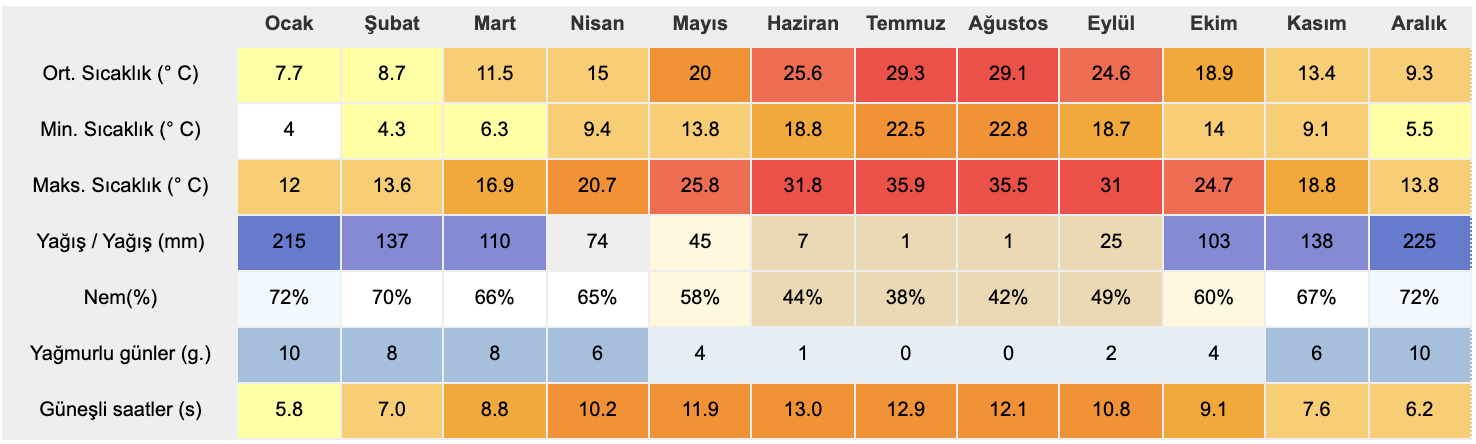|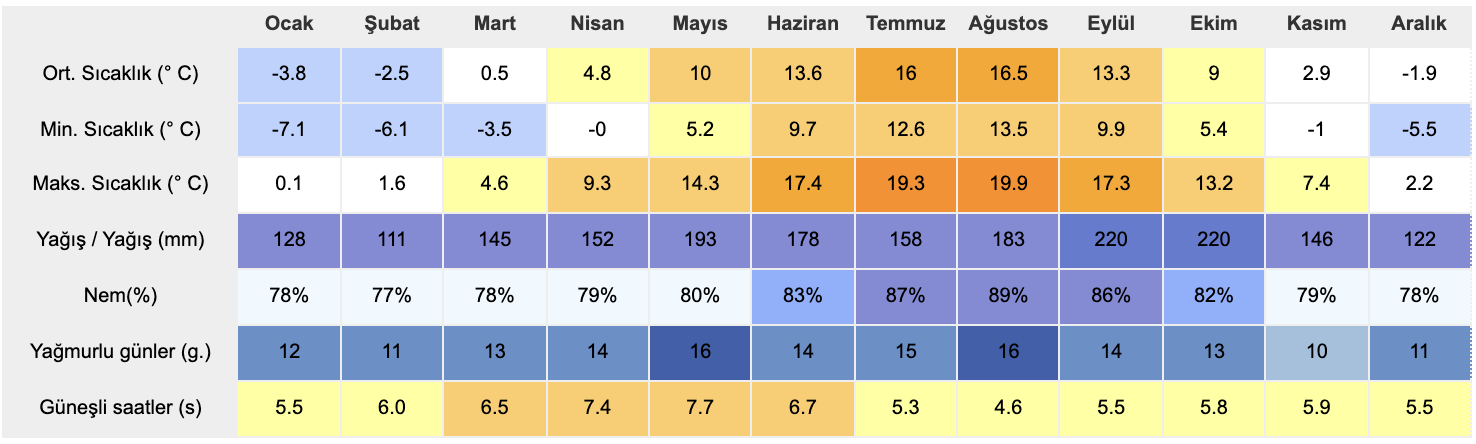
Sri Lanka
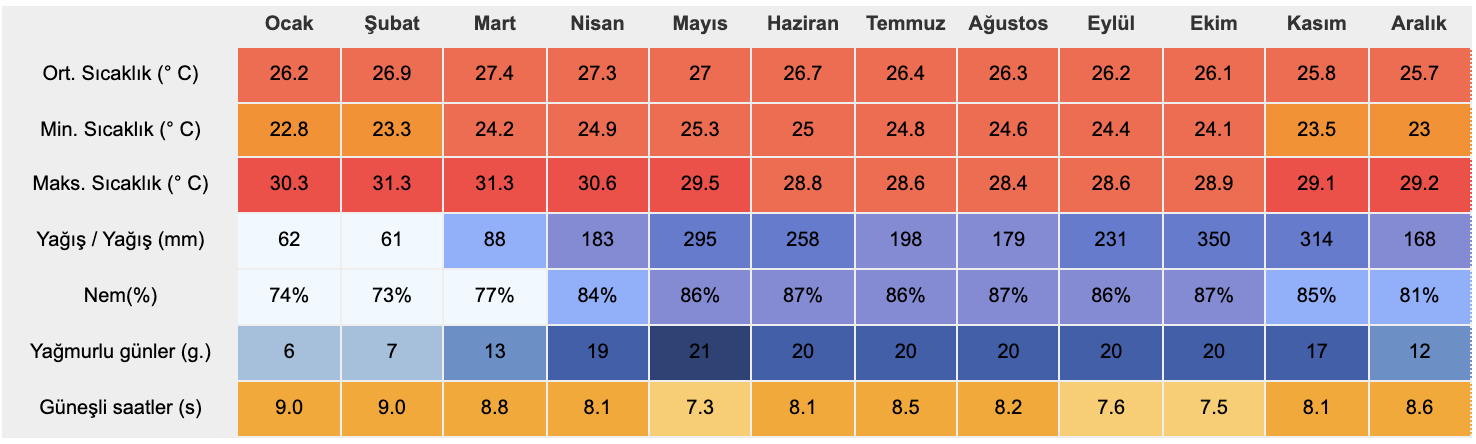

### Ürünün yetiştiği bölgeler

In [60]:
urun = "Çeltik"
k1 = df_final[(df_final.Urun_Adi==urun) & (df_final.Uretim_Miktar>0)].groupby('Il_Adi').apply(lambda x: pd.Series({
    'ilce_1': x.Ilce_Adi.drop_duplicates().shape[0],
    'verim': (x.Uretim_Miktar * x.rating).sum() / x.Uretim_Miktar.sum()
}))
k2 = df_final[(df_final.Urun_Adi==urun) & (df_final.Uretim_Miktar.isna())].groupby('Il_Adi').apply(lambda x: pd.Series({
    'ilce_2': x.Ilce_Adi.drop_duplicates().shape[0],
    'rating': x.rating.mean()
}))
pd.concat([k1,k2],axis=1).sort_index().sort_values('rating', ascending=False)

,ilce_1,verim,ilce_2,rating
Il_Adi,,,,
Iğdır,1.0,0.600000,3.0,0.903543
Antalya,NaN,NaN,19.0,0.893340
Mersin,2.0,0.736107,11.0,0.885294
Çanakkale,6.0,0.897009,6.0,0.864893
Muğla,NaN,NaN,13.0,0.860296
...,...,...,...,...
Kilis,NaN,NaN,4.0,0.691431
Trabzon,NaN,NaN,18.0,0.680509
Hakkari,1.0,0.715372,4.0,0.666184


# Analiz

In [61]:
from ipywidgets import interact

In [62]:
import ipywidgets as wg

option_list = ["Full Parameter", "Default Parameter"]
full_parameter = ['a', 'b', 'c']
default_parameter = ['d', 'e', 'f']

def option1(option_1):
    if option_1 == 'Full Parameter':
        def option2(option_2):
            print(option_2)
        wg.interact(option2, option_2=full_parameter)
    elif option_1 == 'Default Parameter':
        def option2(option_2):
            print(option_2)
        wg.interact(option2, option_2=default_parameter)
wg.interact(option1, option_1=option_list)

interactive(children=(Dropdown(description='option_1', options=('Full Parameter', 'Default Parameter'), value=…

<function __main__.option1(option_1)>

In [63]:
df_ozet

,Il_Adi,Urun_Tipi,Urun_Adi,ilçe_a,miktar,verim_a,ilçe_b,verim_b,ort
0,Antalya,Tahıllar Ve Diğer Bitkisel Ürünler,Çeltik,NaN,NaN,NaN,19.0,0.893340,0.893340
1,Amasya,Tahıllar Ve Diğer Bitkisel Ürünler,Çeltik,2.0,1880.0,0.969944,5.0,0.799797,0.884870
2,Çanakkale,Tahıllar Ve Diğer Bitkisel Ürünler,Çeltik,6.0,105745.0,0.897009,6.0,0.864893,0.880951
3,Muğla,Tahıllar Ve Diğer Bitkisel Ürünler,Çeltik,NaN,NaN,NaN,13.0,0.860296,0.860296
4,Yalova,Tahıllar Ve Diğer Bitkisel Ürünler,Çeltik,NaN,NaN,NaN,6.0,0.856886,0.856886
...,...,...,...,...,...,...,...,...,...
13838,Nevşehir,Süs Bitkileri,Dış Mekan Süs Bitkileri,NaN,NaN,NaN,1.0,0.110983,0.110983
13839,Siirt,Sebzeler,Domates (Sofralık),6.0,14581.0,0.108489,NaN,NaN,0.108489
13840,Hakkari,Tahıllar Ve Diğer Bitkisel Ürünler,Yonca (Yeşilot),5.0,191930.0,0.106493,NaN,NaN,0.106493
13841,Ağrı,Süs Bitkileri,Dış Mekan Süs Bitkileri,NaN,NaN,NaN,2.0,0.105006,0.105006


In [115]:
il = 'Antalya'
tahmin_urun_list = df_ozet[(df_ozet.Urun_Adi.str.contains('a'))].groupby('Urun_Adi').miktar.sum().sort_values(ascending=False).iloc[:70].index.to_list()

#df_ozet[(df_ozet.Il_Adi=='Antalya') & (df_ozet.Urun_Adi.isin(urun_list))]
df1 = df_ozet[(df_ozet.Il_Adi==il) & (df_ozet.Urun_Adi.isin(tahmin_urun_list)) & (df_ozet.miktar >0)].sample(5)
for il in np.unique([i[0] for i in ilceler]).tolist():
    try:
        df2 = df_ozet[(df_ozet.Il_Adi==il) & (df_ozet.Urun_Adi.isin(tahmin_urun_list)) & (df_ozet.miktar.isna())].sample(5)
    except:
        print(il)


# heroku deploy

In [24]:
%%bash
cd /Users/alperaydin/Google\ Drive/My\ Drive/Projects/Dijitar/Tubitak
ls -ltr
heroku git:remote -a dijitar
git add .

Process is interrupted.


%%bash
git commit -am "ilce detay,aciklamalar"
git push heroku master

In [25]:
!heroku logs --tail

2022-11-22T21:40:39.953198+00:00 heroku[router]: at=info method=GET path="/static/css/bootstrap.min.css" host=dijitar.herokuapp.com request_id=9136c63c-e38d-4a39-b747-e15b77250068 fwd="151.250.247.118" dyno=web.1 connect=0ms service=3ms status=304 bytes=185 protocol=http
2022-11-22T21:40:39.954199+00:00 app[web.1]: 10.1.16.139 - - [22/Nov/2022:21:40:39 +0000] "GET /static/css/style1.css HTTP/1.1" 304 0 "http://dijitar.herokuapp.com/" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36"
2022-11-22T21:40:40.002862+00:00 heroku[router]: at=info method=GET path="/static/js/paths.js" host=dijitar.herokuapp.com request_id=7ecc29e4-7972-49a3-84d9-c16a79a89bf7 fwd="151.250.247.118" dyno=web.1 connect=0ms service=3ms status=304 bytes=176 protocol=http
2022-11-22T21:40:40.024340+00:00 heroku[router]: at=info method=GET path="/static/js/turkiye.js?v=123" host=dijitar.herokuapp.com request_id=e4a161e6-5bba-4386-b5a9-f0a1f3bc0806 fw

2022-11-22T21:40:42.640628+00:00 app[web.1]: 10.1.24.219 - - [22/Nov/2022:21:40:42 +0000] "GET /getil?il=Konya&mode=a HTTP/1.1" 200 3478 "http://dijitar.herokuapp.com/" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36"
2022-11-22T21:41:11.700400+00:00 heroku[router]: at=info method=POST path="/tahmin_urun_al" host=dijitar.herokuapp.com request_id=bf5ae208-5b9f-4a0d-abca-6fc1255f9900 fwd="151.250.247.118" dyno=web.1 connect=0ms service=14ms status=200 bytes=3203 protocol=http
2022-11-22T21:41:11.705942+00:00 app[web.1]: 10.1.24.219 - - [22/Nov/2022:21:41:11 +0000] "POST /tahmin_urun_al HTTP/1.1" 200 3056 "http://dijitar.herokuapp.com/" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36"
2022-11-22T21:42:28.565130+00:00 app[web.1]: urun bilgi []
2022-11-22T21:42:28.565723+00:00 app[web.1]: 10.1.44.35 - - [22/Nov/2022:21:42:28 +0000] "GET /urun_bilgi_ok

2022-11-22T21:48:06.595061+00:00 heroku[router]: at=info method=GET path="/static/css/normalize.css" host=dijitar.herokuapp.com request_id=716264d4-deb9-4844-a49e-7cdc92bc1d2e fwd="31.143.47.75" dyno=web.1 connect=0ms service=1ms status=200 bytes=8324 protocol=http
2022-11-22T21:48:06.620134+00:00 heroku[router]: at=info method=GET path="/static/js/jquery-1.8.0.min.js" host=dijitar.herokuapp.com request_id=b835b922-7ce0-49b3-8f96-e25f2191d0de fwd="31.143.47.75" dyno=web.1 connect=0ms service=3ms status=200 bytes=92854 protocol=http
2022-11-22T21:48:06.717576+00:00 heroku[router]: at=info method=GET path="/static/js/paths.js" host=dijitar.herokuapp.com request_id=a8934f70-8359-4568-8562-4f1e83897c39 fwd="31.143.47.75" dyno=web.1 connect=0ms service=4ms status=200 bytes=191743 protocol=http
2022-11-22T21:48:06.708405+00:00 heroku[router]: at=info method=GET path="/static/js/turkiye.js?v=123" host=dijitar.herokuapp.com request_id=64737f92-7e71-4306-b5d2-aa4d5d3b0a7d fwd="31.143.47.75" dyn

2022-11-22T21:48:07.145424+00:00 app[web.1]: 10.1.8.207 - - [22/Nov/2022:21:48:07 +0000] "GET /static/img/hero-bg.jpeg HTTP/1.1" 200 0 "http://dijitar.herokuapp.com/static/css/style1.css" "Mozilla/5.0 (Linux; Android 10; SNE-LX1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Mobile Safari/537.36"
2022-11-22T21:48:07.534485+00:00 heroku[router]: at=info method=GET path="/get_urunler" host=dijitar.herokuapp.com request_id=798f8406-5c91-43b0-8b83-dcd7c7d91d99 fwd="31.143.47.75" dyno=web.1 connect=0ms service=12ms status=200 bytes=4434 protocol=http
2022-11-22T21:48:07.530493+00:00 app[web.1]: 10.1.8.207 - - [22/Nov/2022:21:48:07 +0000] "GET /get_urunler HTTP/1.1" 200 4287 "http://dijitar.herokuapp.com/" "Mozilla/5.0 (Linux; Android 10; SNE-LX1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Mobile Safari/537.36"
2022-11-22T21:48:07.542572+00:00 app[web.1]: 10.1.24.219 - - [22/Nov/2022:21:48:07 +0000] "GET /get_iller HTTP/1.1" 200 3853 "http://dijitar.herokuapp.com/" "Mo

2022-11-22T21:48:34.661372+00:00 heroku[router]: at=info method=GET path="/static/js/turkiye.js?v=123" host=dijitar.herokuapp.com request_id=8dca438b-ae0b-466c-8a99-db197b089d13 fwd="31.143.47.75" dyno=web.1 connect=0ms service=1ms status=304 bytes=178 protocol=http
2022-11-22T21:48:34.813477+00:00 heroku[router]: at=info method=GET path="/static/img/hero-bg.jpeg" host=dijitar.herokuapp.com request_id=e9bbd54e-4367-4546-b626-4d3d444aa2cb fwd="31.143.47.75" dyno=web.1 connect=0ms service=1ms status=304 bytes=180 protocol=http
2022-11-22T21:48:34.653613+00:00 heroku[router]: at=info method=GET path="/static/js/jquery.qtip.min.js" host=dijitar.herokuapp.com request_id=ea431752-9e2f-4d8a-8c15-2ccad0736b64 fwd="31.143.47.75" dyno=web.1 connect=0ms service=2ms status=304 bytes=186 protocol=http
2022-11-22T21:48:34.649981+00:00 app[web.1]: 10.1.24.219 - - [22/Nov/2022:21:48:34 +0000] "GET /static/js/paths.js HTTP/1.1" 304 0 "http://dijitar.herokuapp.com/aciklama" "Mozilla/5.0 (Linux; Android 

2022-11-22T21:48:34.547937+00:00 heroku[router]: at=info method=GET path="/static/css/bootstrap.min.css" host=dijitar.herokuapp.com request_id=718eb524-411c-4140-9e3e-b49b9e89aa50 fwd="31.143.47.75" dyno=web.1 connect=0ms service=2ms status=304 bytes=185 protocol=http
2022-11-22T21:48:34.794833+00:00 heroku[router]: at=info method=GET path="/static/img/aciklama_collaborative.png" host=dijitar.herokuapp.com request_id=fc6996ae-8c55-40bc-a069-6e288a3fd309 fwd="31.143.47.75" dyno=web.1 connect=0ms service=3ms status=200 bytes=183594 protocol=http
2022-11-22T21:48:34.549516+00:00 heroku[router]: at=info method=GET path="/static/js/jquery-1.8.0.min.js" host=dijitar.herokuapp.com request_id=8e07b48e-4ff6-40b3-af14-494b72783129 fwd="31.143.47.75" dyno=web.1 connect=0ms service=3ms status=304 bytes=187 protocol=http
2022-11-22T21:48:58.961118+00:00 heroku[router]: at=info method=GET path="/static/css/normalize.css" host=dijitar.herokuapp.com request_id=4fcb5e29-6570-421e-8fb9-99ff45e6cd20 fwd=

2022-11-22T21:48:59.531498+00:00 app[web.1]: 10.1.19.110 - - [22/Nov/2022:21:48:59 +0000] "GET /get_iller HTTP/1.1" 200 3853 "http://dijitar.herokuapp.com/" "Mozilla/5.0 (Linux; Android 10; SNE-LX1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Mobile Safari/537.36"
2022-11-22T21:48:59.544721+00:00 app[web.1]: 10.1.16.139 - - [22/Nov/2022:21:48:59 +0000] "GET /get_urunler HTTP/1.1" 200 4287 "http://dijitar.herokuapp.com/" "Mozilla/5.0 (Linux; Android 10; SNE-LX1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Mobile Safari/537.36"
2022-11-22T21:48:59.550865+00:00 app[web.1]: 10.1.24.219 - - [22/Nov/2022:21:48:59 +0000] "GET /getil?il=Antalya&mode=a HTTP/1.1" 200 3438 "http://dijitar.herokuapp.com/" "Mozilla/5.0 (Linux; Android 10; SNE-LX1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Mobile Safari/537.36"
2022-11-22T21:48:58.820035+00:00 app[web.1]: df_final (170398, 12)
2022-11-22T21:48:58.820049+00:00 app[web.1]: df_ozet (13843, 12)
2022-11-22T21:48:58.8

# temp

In [17]:
import pandas as pd
import pickle as pkl

#df_ozet = pkl.load(open('../app/static/data/df_ozet.pkl','rb'))

# [(~df_ozet.Urun_Adi.str.contains('a'))]
tahmin_urun_list = df_ozet.groupby('Urun_Adi').miktar.sum().sort_values(ascending=False).iloc[:80].index.to_list()
#tahmin_urun_list

il = 'Antalya'
df1 = df_ozet[(df_ozet.Il_Adi==il) & (df_ozet.Urun_Adi.isin(tahmin_urun_list)) & (df_ozet.miktar >0)].sample(5)
df2 = df_ozet[(df_ozet.Il_Adi==il) & (df_ozet.Urun_Adi.isin(tahmin_urun_list)) & (df_ozet.miktar.isna())]
df2 = df2.sample(min(5, df2.shape[0]))
df = pd.concat([df1, df2])

df2


,Il_Adi,Urun_Tipi,Urun_Adi,ilçe_a,miktar,verim_a,ilçe_b,verim_b,ort,Uretim_Sira,Verim_Sira,Tahmin_Sira
92,Antalya,Meyveler Içecek Ve Baharat Bitkileri,Çay Yaprakları,NaN,NaN,NaN,19.0,0.762976,0.762976,NaN,NaN,3.0
170,Antalya,Tahıllar Ve Diğer Bitkisel Ürünler,Arpa (Biralık),NaN,NaN,NaN,19.0,0.733042,0.733042,NaN,NaN,2.0
137,Antalya,Tahıllar Ve Diğer Bitkisel Ürünler,"Mercimek, Kuru (Kırmızı)",NaN,NaN,NaN,19.0,0.744155,0.744155,NaN,NaN,2.0
408,Antalya,Meyveler Içecek Ve Baharat Bitkileri,"Biber, Kuru, İşlenmemiş",NaN,NaN,NaN,19.0,0.685639,0.685639,NaN,NaN,2.0
0,Antalya,Tahıllar Ve Diğer Bitkisel Ürünler,Çeltik,NaN,NaN,NaN,19.0,0.893340,0.893340,NaN,NaN,2.0


In [57]:
import pandas as pd
df = pd.read_excel('../data/tahil_13.xls')
df[df.iloc[:,1].fillna('').str.contains('eten')].iloc[:,1]

25     Ekilen Alan ve 01.16.19.00.01. (Keten, Lif) - ...
64     Hasat Edilen Alan ve 01.16.19.00.01. (Keten, L...
103     Verim ve 01.16.19.00.01. (Keten, Lif) - Kg/Dekar
142    Üretim Miktarı ve 01.16.19.00.01. (Keten, Lif)...
Name: Unnamed: 1, dtype: object

# Endüstriyel Ürünler

1. Lif ve Kauçuk bitkileri 
Bu grup içerisinde yer alan lif bitkileri içerisinde, başta pamuk, keten, kenevir, jüt, rami, hibiskus (kenaf), rosella, güneş keneviri, lif kabağı, kapok, manila keneviri ve sisal keneviri sayılabilir. Bu bitkilerden liflerin elde ediliş yerlerine göre sınıflandırıldığında; tohumundan lif elde edilen pamuk, saplarından lif elde edilenler, keten, kenevir, jüt, rami, kenaf, rosella, güneş keneviri, meyvesinden lif elde edilenler, lif kabağı ve kapok, yapraklarından lif elde edilenler de manila ve sisal kenevirleri olarak karşımıza çıkmaktadır.

2. Yağ Bitkileri 
Bu grup da kendi içerisinde kullanılan alanlara göre 2 grupta değerlendirilmektedir. Daha ziyade elde edilen yağlar gerek sıvı (likit)  halde gerekse de katı (margarin) halinde doğrudan insan beslenmesi kullanılan 1. sınıf yağ bitkileri olarak isimlendirilen ayçiçeği, soya, kolza (kanola), yer fıstığı, susam, haşhaş, aspir ve yağ şalgamı bitkileridir. Doğrudan insan beslenmesinde içerdikleri yağın yağ asitleri kalitesinin uygun olmaması nedeniyle 2. sınıf yağ bitkileri olarak isimlendirilenler de ızgın, ketencik, pelemir, hardal, hintyağı ve jojoba bitkileridir.

3. Nişasta ve Şeker: Bu gruba ismini veren nişasta bitkileri içerinde patates ilk sırayı almakta bunu yerelması ve tatlı patates (batat) takip etmektedir. Ayrıca Güney Amerika kıtasında yaygın olarak yetiştirilen cassava (manibot) ve yam bitkisinde önemli nişasta bitkileridir. Dünyada şeker bitkisi olarak tanınan 2 bitki bulunmakta olup bunlar; şekerpancarı ve şekerkamışıdır. Dünya şeker üretiminin %70’i şekerkamışından, %30’u  ülkemizde de olduğu gibi şekerpancarından karşılanmaktadır.

4. Tütün, İlaç ve Baharat: Endüstri bitkilerinin grubu içerisinde en çok bitki grubunu kapsayan bu gruptur. Bu grup içerisinde keyif bitkileri olarak tanımlanan tütün, şerbetçiotu, anason yanında, kimyon, kişniş, kekik, hardal, karabiber, çemen gibi baharat bitkileri ile bitki organlarının farklı yerlerinde içerdikleri alkoloitleri ve glikozitler nedeniyle ilaç sanayinde kullanılan haşhaş, melisa, adaçayı, meyankökü, banotu, yüksükotu, datura ve atropa gibi bitkiler yer almaktadır. 

In [35]:
#urunler = df_ozet.Urun_Adi.drop_duplicates()
endustriyel = [66,78,101]
urunler[urunler.str.lower().str.contains('')]

Series([], Name: Urun_Adi, dtype: object)